# Template of a SMI jupyter notebook

In [2]:
# These packages should all be installed if the procedure was followed
%pylab nbagg

import matplotlib.pyplot as plt

from smi_analysis import SMI_beamline
import numpy as np
import fabio
import os
import numpy as np

plt.rcParams["figure.figsize"] = (10, 5)

Populating the interactive namespace from numpy and matplotlib


## Experimental configuration

## Locate the files on your computer

In [3]:
CYCLE='2024_1'
proposal_id =  '314903_Chaney_04'

path = '/nsls2/data/smi/legacy/results/data/%s/%s/900KW/'%(CYCLE, proposal_id)



for file in np.sort(os.listdir(path)):
    if 'wa20' in file:
        print(file)
        
print('Done')

TC_Trmsn_01_prs0deg_sdd1.8m_2445.00eV_wa20_bpm5.096_id515782_000000_WAXS.tif
TC_Trmsn_01_prs0deg_sdd1.8m_2450.00eV_wa20_bpm5.128_id515783_000000_WAXS.tif
TC_Trmsn_01_prs0deg_sdd1.8m_2455.00eV_wa20_bpm5.164_id515784_000000_WAXS.tif
TC_Trmsn_01_prs0deg_sdd1.8m_2460.00eV_wa20_bpm5.223_id515785_000000_WAXS.tif
TC_Trmsn_01_prs0deg_sdd1.8m_2465.00eV_wa20_bpm5.263_id515786_000000_WAXS.tif
TC_Trmsn_01_prs0deg_sdd1.8m_2470.00eV_wa20_bpm5.288_id515787_000000_WAXS.tif
TC_Trmsn_01_prs0deg_sdd1.8m_2470.25eV_wa20_bpm5.281_id515788_000000_WAXS.tif
TC_Trmsn_01_prs0deg_sdd1.8m_2470.50eV_wa20_bpm5.268_id515789_000000_WAXS.tif
TC_Trmsn_01_prs0deg_sdd1.8m_2470.75eV_wa20_bpm5.291_id515790_000000_WAXS.tif
TC_Trmsn_01_prs0deg_sdd1.8m_2471.00eV_wa20_bpm5.269_id515791_000000_WAXS.tif
TC_Trmsn_01_prs0deg_sdd1.8m_2471.25eV_wa20_bpm5.290_id515792_000000_WAXS.tif
TC_Trmsn_01_prs0deg_sdd1.8m_2471.50eV_wa20_bpm5.276_id515793_000000_WAXS.tif
TC_Trmsn_01_prs0deg_sdd1.8m_2471.75eV_wa20_bpm5.278_id515794_000000_WAXS.tif

In [5]:
#waxs
path = '/nsls2/data/smi/legacy/results/data/%s/%s/900KW/'%(CYCLE, proposal_id)

sam = []
for file in os.listdir(path):
     if '2471.00eV' in file and 'prs' in file:
        idx = file.find('2471.00eV')
        if file[:idx] not in sam:
            sam = sam + [file[:idx]]

print(sam)

all_dat = [[]] * len(sam)
    
for j, sa in enumerate(sam): 
    for file in sorted(os.listdir(path)):
        if sa in file and 'tif' in file and 'wa20' in file:
            all_dat[j] = all_dat[j] + [file]
            
print(all_dat[0])

['TC_Trmsn_01_prs55deg_sdd1.8m_', 'TC_Trmsn_23_prs55deg_sdd1.8m_', 'TC_Trmsn_34_prs0deg_sdd1.8m_', 'TC_Trmsn_30_prs0deg_sdd1.8m_', 'TC_Trmsn_21_prs55deg_sdd1.8m_', 'TC_Trmsn_03_prs55deg_sdd1.8m_', 'TC_Trmsn_22_prs35deg_damagetest_sdd1.8m_', 'TC_Trmsn_30_prs35deg_sdd1.8m_', 'TC_Trmsn_29_prs35deg_sdd1.8m_', 'TC_Trmsn_29_prs55deg_sdd1.8m_', 'TC_Trmsn_33_prs55deg_sdd1.8m_', 'TC_Trmsn_35_prs0deg_sdd1.8m_', 'TC_Trmsn_14_prs0deg_sdd1.8m_', 'TC_Trmsn_01_prs35deg_sdd1.8m_', 'TC_Trmsn_18_prs0deg_sdd1.8m_', 'TC_Trmsn_14_prs35deg_sdd1.8m_', 'TC_Trmsn_23_prs35deg_sdd1.8m_', 'TC_Trmsn_14_prs35deg_damagetest_sdd1.8m_', 'TC_Trmsn_26_prs55deg_sdd1.8m_', 'TC_Trmsn_17_prs35deg_sdd1.8m_', 'TC_Trmsn_03_prs35deg_sdd1.8m_', 'TC_Trmsn_34_prs35deg_sdd1.8m_', 'TC_Trmsn_17_prs0deg_sdd1.8m_', 'TC_Trmsn_17_prs55deg_sdd1.8m_', 'TC_Trmsn_03_prs0deg_sdd1.8m_', 'TC_Trmsn_21_prs35deg_sdd1.8m_', 'TC_Trmsn_22_prs35deg_sdd1.8m_', 'TC_Trmsn_18_prs35deg_sdd1.8m_', 'TC_Trmsn_30_prs55deg_sdd1.8m_', 'TC_Trmsn_34_prs55deg_sdd1.

In [17]:
sam = []
for file in os.listdir(path):
     if '2471.00eV' in file and 'wa20' in file and 'prs55deg' in file:
        idx = file.find('prs')
        if file[:idx] not in sam:
            sam = sam + [file[:idx]]
print(sam)

['TC_Trmsn_23_', 'TC_Trmsn_33_', 'TC_Trmsn_26_', 'TC_Trmsn_29_', 'TC_Trmsn_21_', 'TC_Trmsn_30_', 'TC_Trmsn_34_', 'TC_Trmsn_22_', 'TC_Trmsn_18_', 'TC_Trmsn_03_', 'TC_Trmsn_17_', 'TC_Trmsn_01_', 'TC_Trmsn_35_', 'TC_Trmsn_14_']


In [21]:
all_dat

[['TC_Trmsn_01_prs55deg_sdd1.8m_2445.00eV_wa20_bpm5.229_id519310_000000_WAXS.tif',
  'TC_Trmsn_01_prs55deg_sdd1.8m_2450.00eV_wa20_bpm5.239_id519311_000000_WAXS.tif',
  'TC_Trmsn_01_prs55deg_sdd1.8m_2455.00eV_wa20_bpm5.290_id519312_000000_WAXS.tif',
  'TC_Trmsn_01_prs55deg_sdd1.8m_2460.00eV_wa20_bpm5.346_id519313_000000_WAXS.tif',
  'TC_Trmsn_01_prs55deg_sdd1.8m_2465.00eV_wa20_bpm5.376_id519314_000000_WAXS.tif',
  'TC_Trmsn_01_prs55deg_sdd1.8m_2470.00eV_wa20_bpm5.395_id519315_000000_WAXS.tif',
  'TC_Trmsn_01_prs55deg_sdd1.8m_2470.25eV_wa20_bpm5.394_id519316_000000_WAXS.tif',
  'TC_Trmsn_01_prs55deg_sdd1.8m_2470.50eV_wa20_bpm5.403_id519317_000000_WAXS.tif',
  'TC_Trmsn_01_prs55deg_sdd1.8m_2470.75eV_wa20_bpm5.409_id519318_000000_WAXS.tif',
  'TC_Trmsn_01_prs55deg_sdd1.8m_2471.00eV_wa20_bpm5.387_id519319_000000_WAXS.tif',
  'TC_Trmsn_01_prs55deg_sdd1.8m_2471.25eV_wa20_bpm5.388_id519320_000000_WAXS.tif',
  'TC_Trmsn_01_prs55deg_sdd1.8m_2471.50eV_wa20_bpm5.395_id519321_000000_WAXS.tif',
  'T

<IPython.core.display.Javascript object>


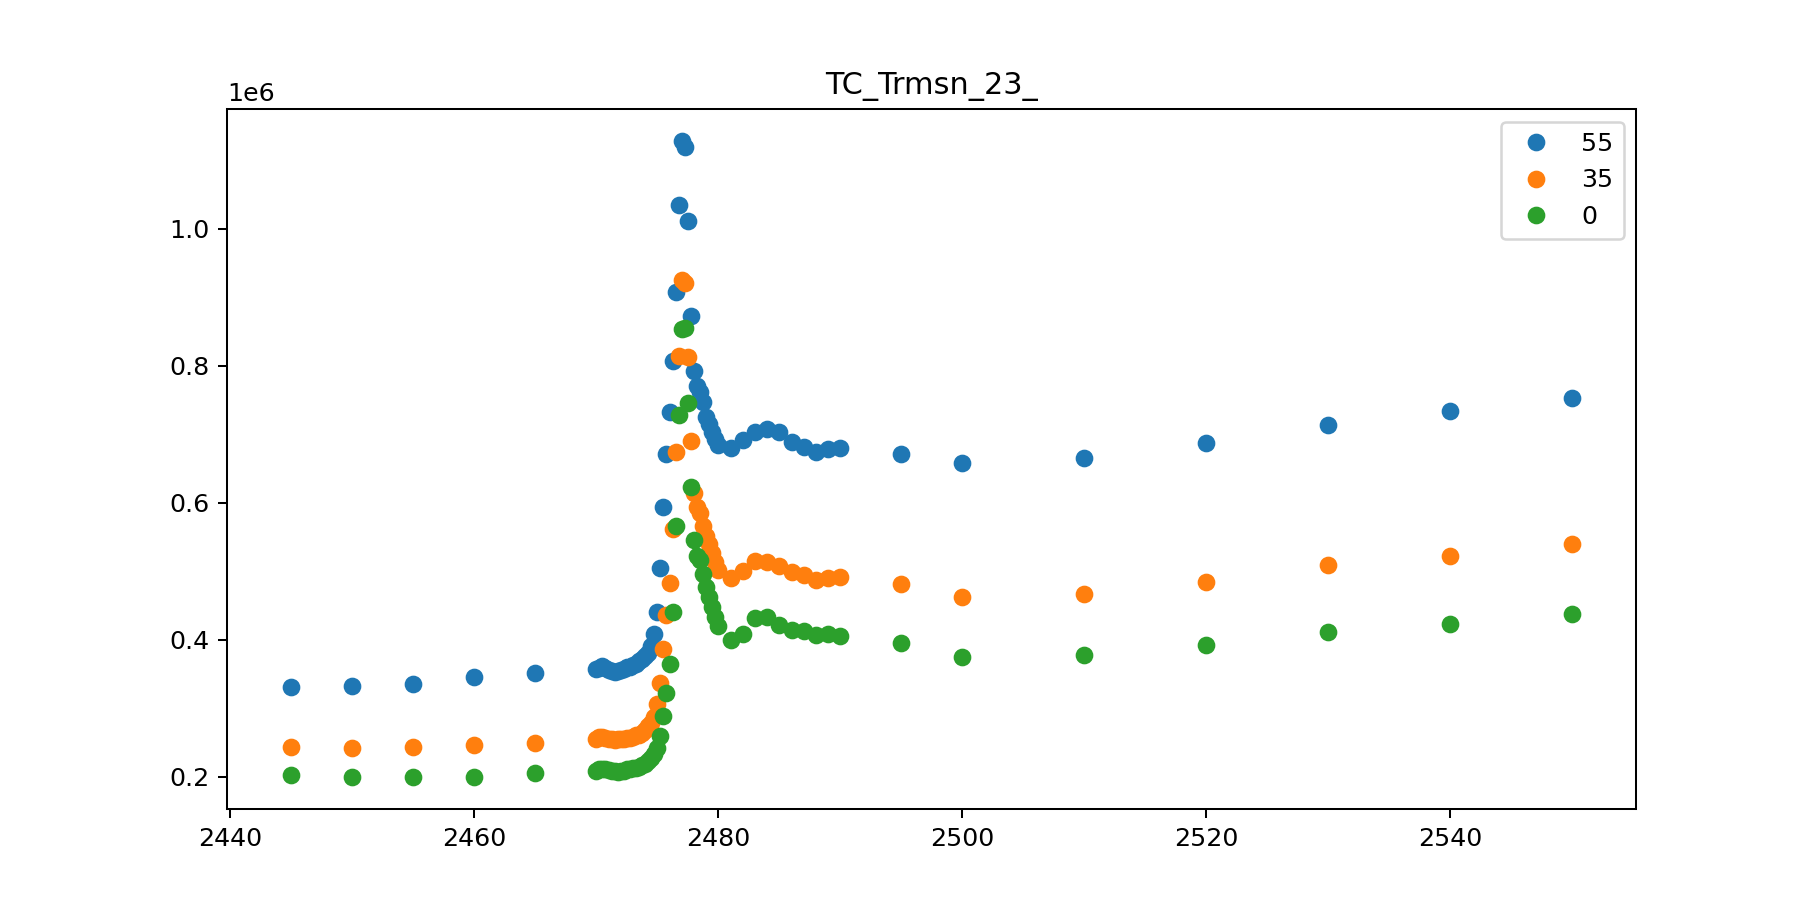

Done


<IPython.core.display.Javascript object>


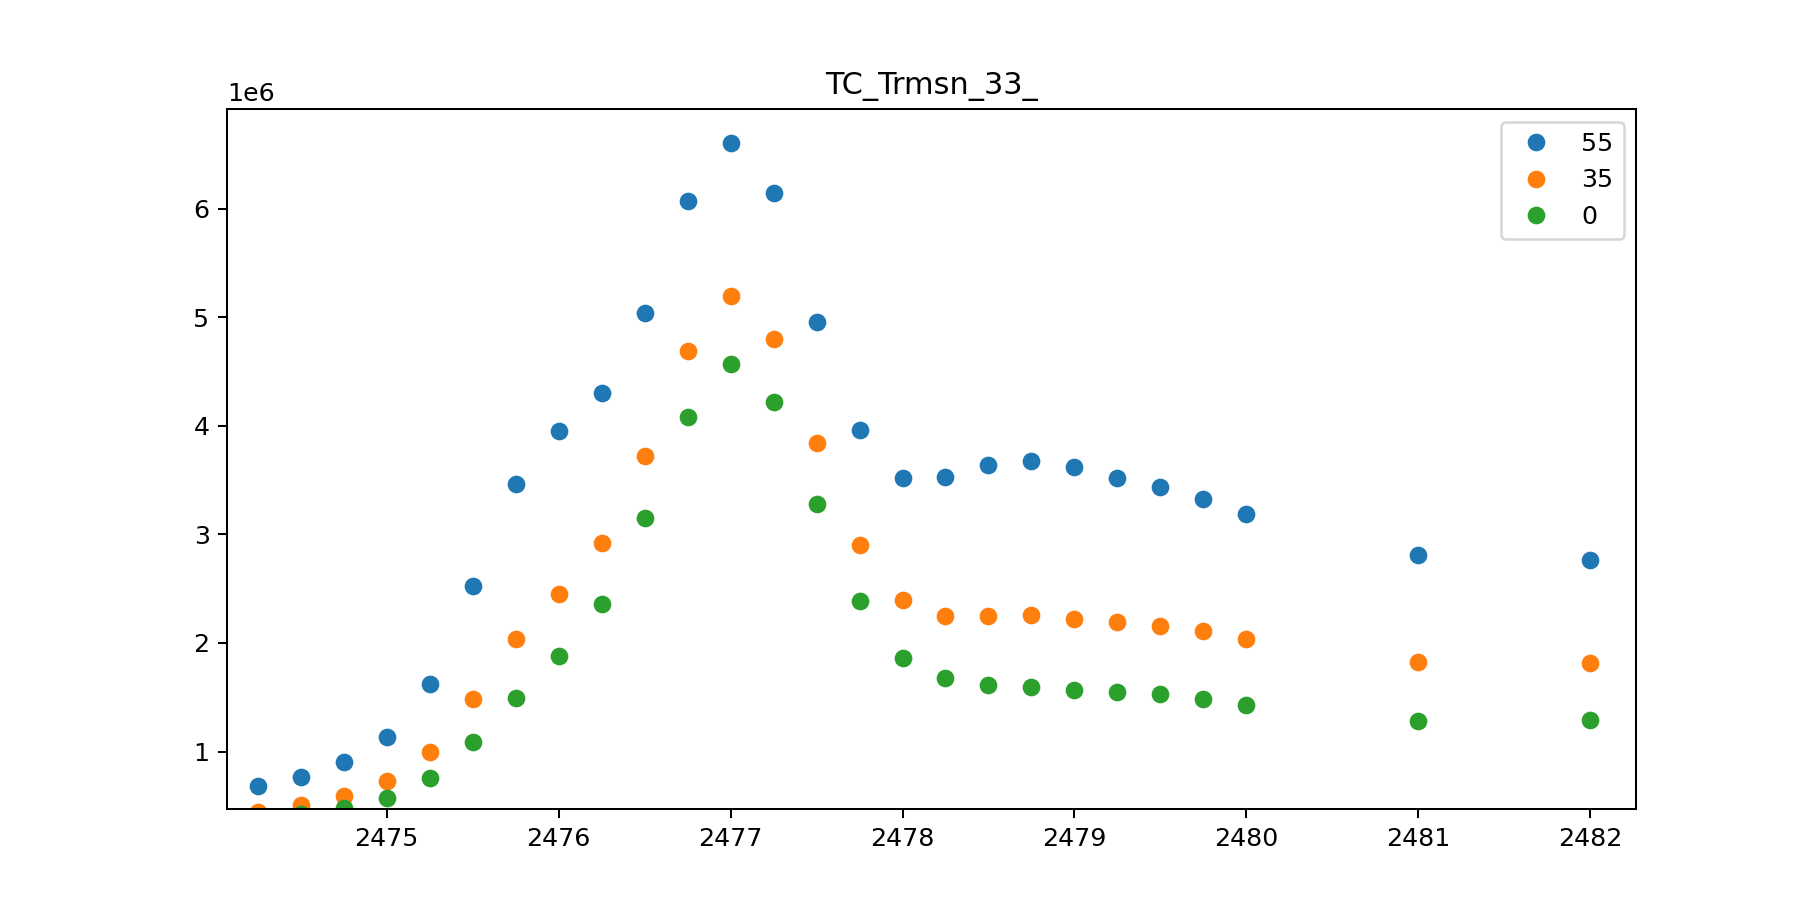

Done


<IPython.core.display.Javascript object>


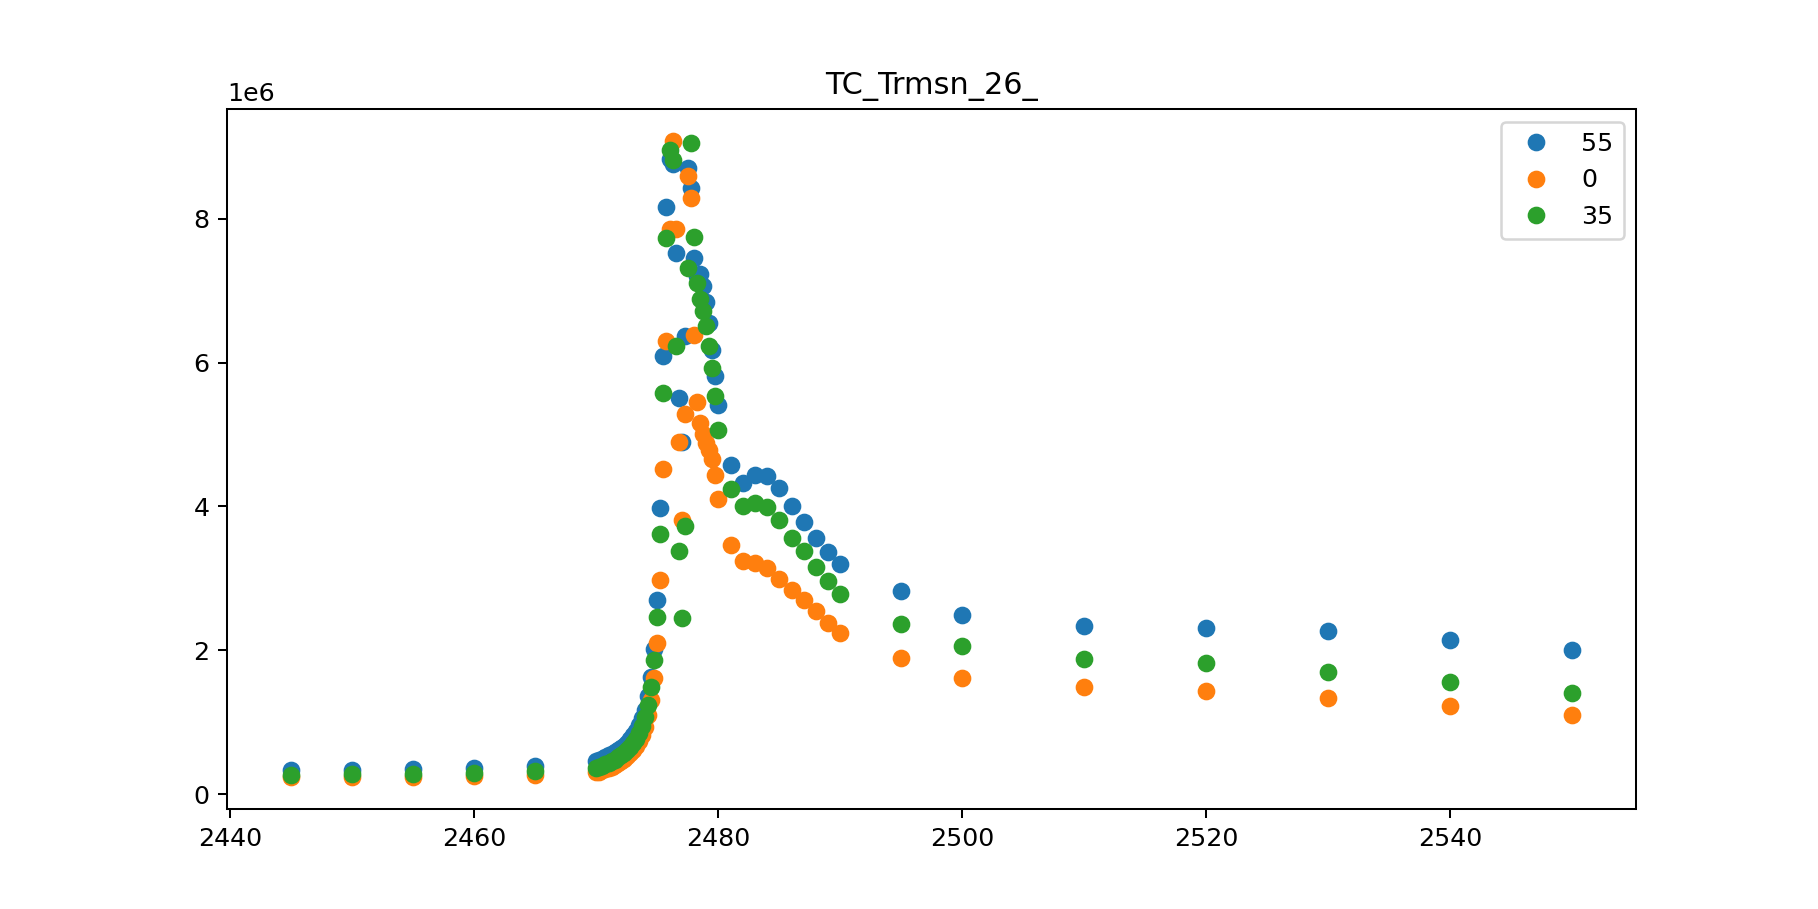

Done


<IPython.core.display.Javascript object>


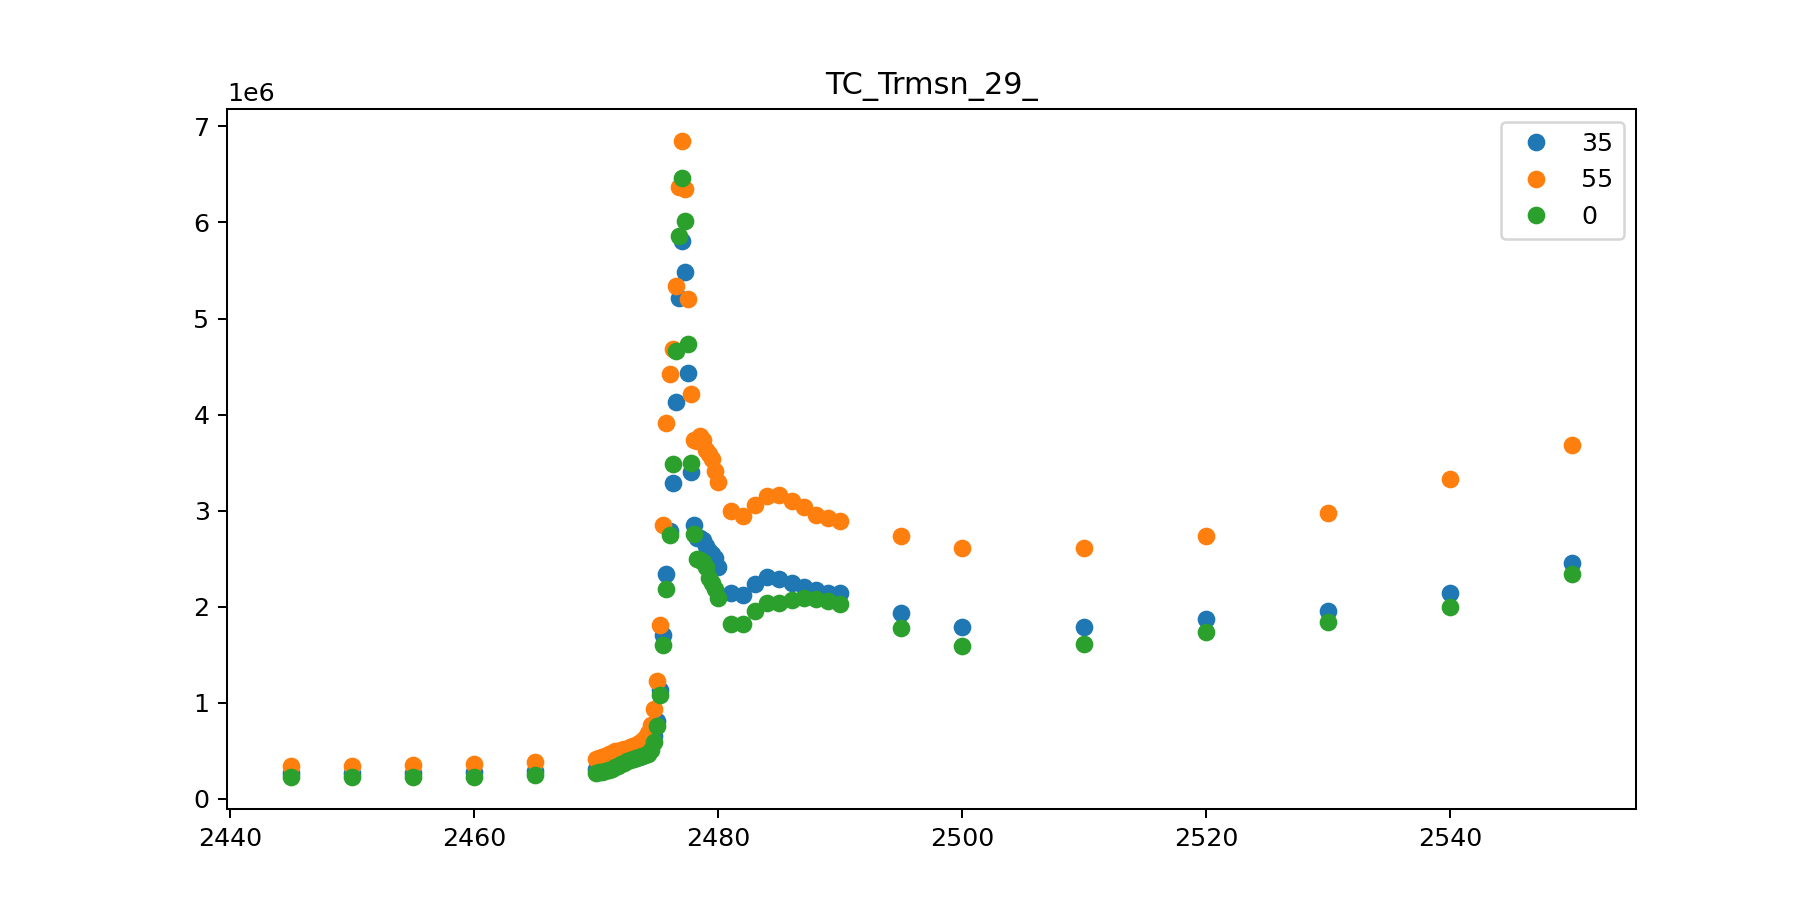

Done


<IPython.core.display.Javascript object>


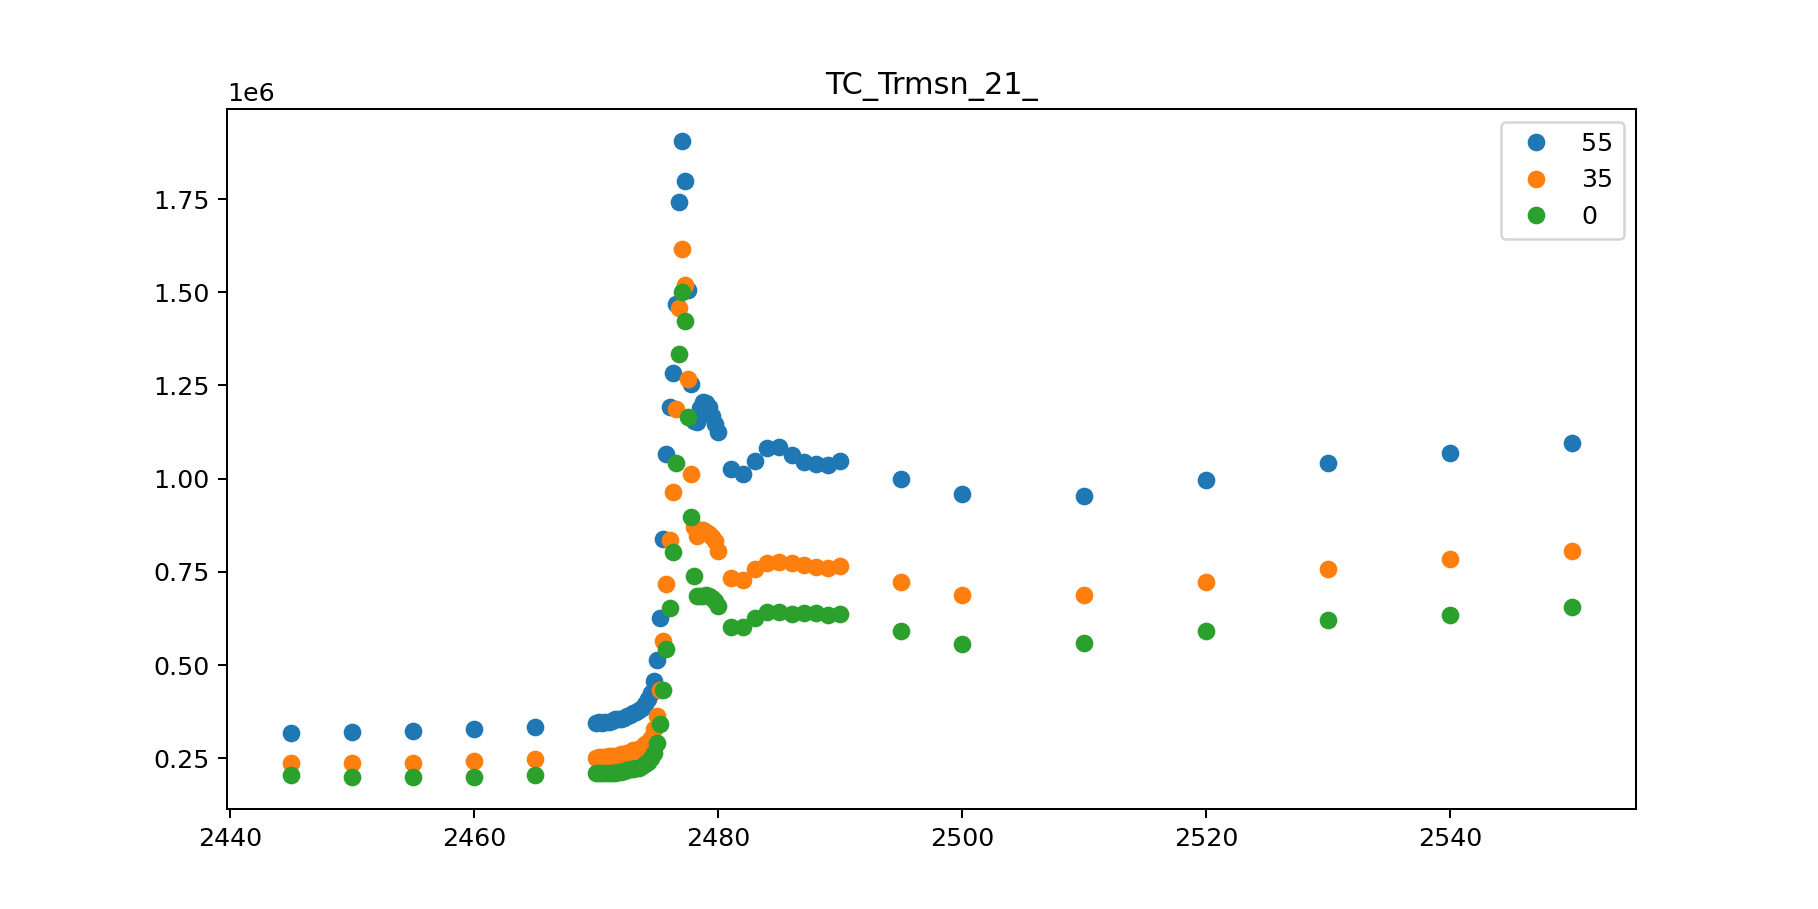

Done


<IPython.core.display.Javascript object>


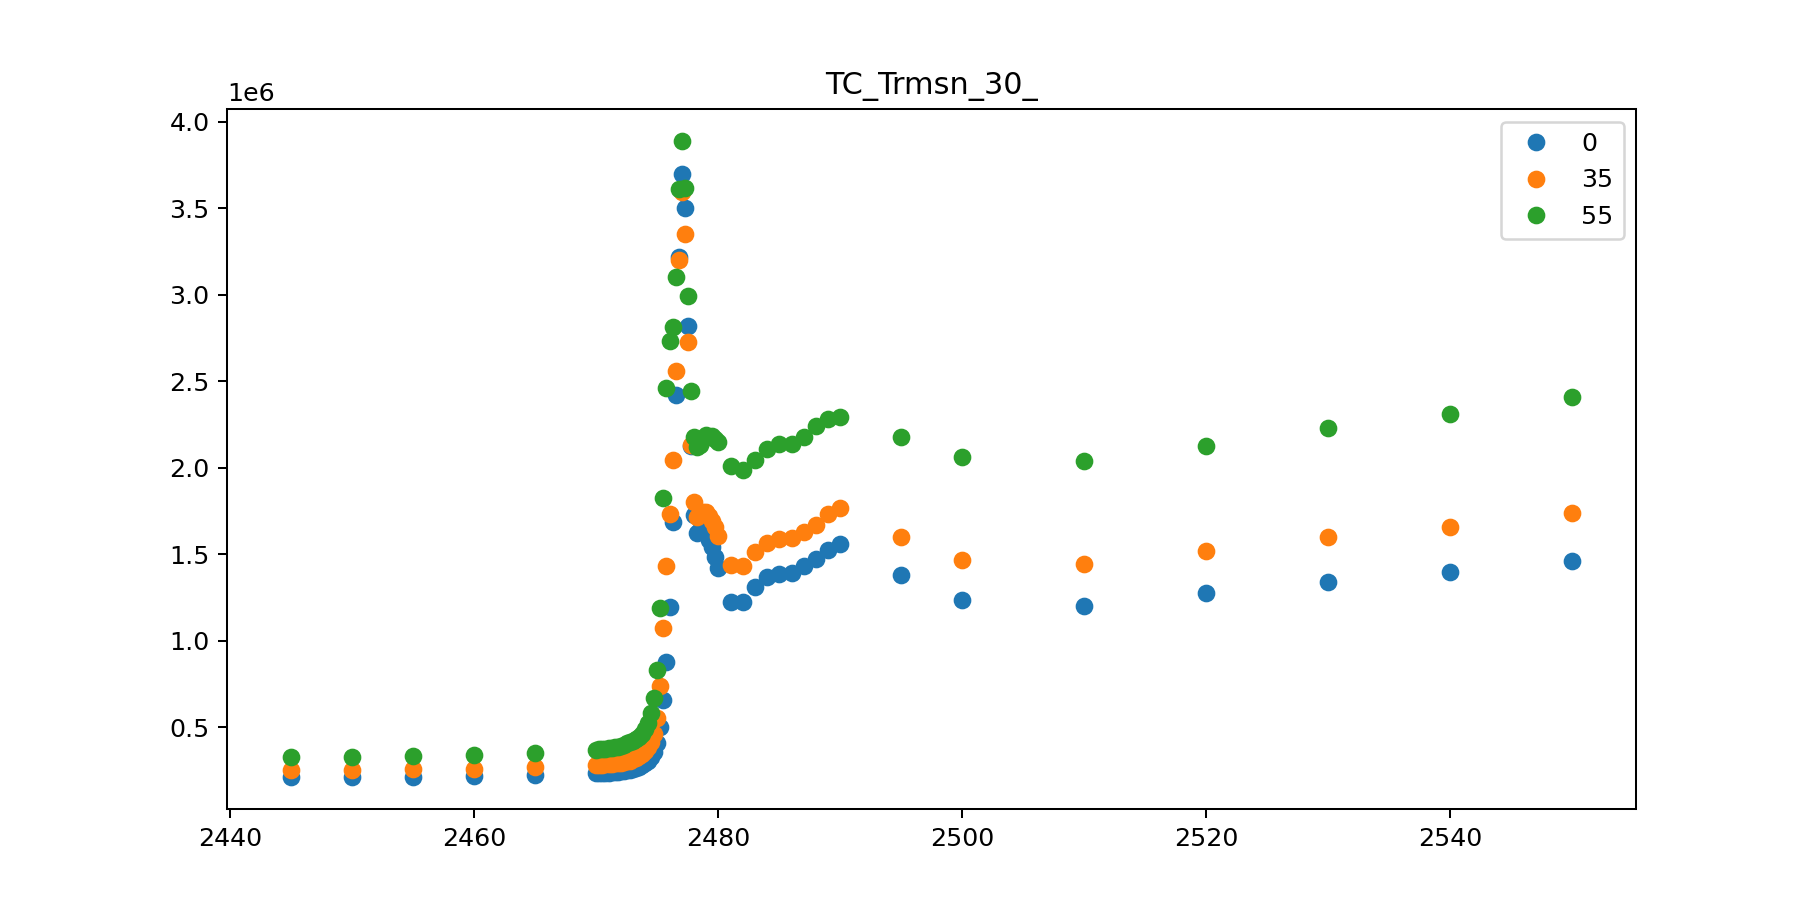

Done


<IPython.core.display.Javascript object>


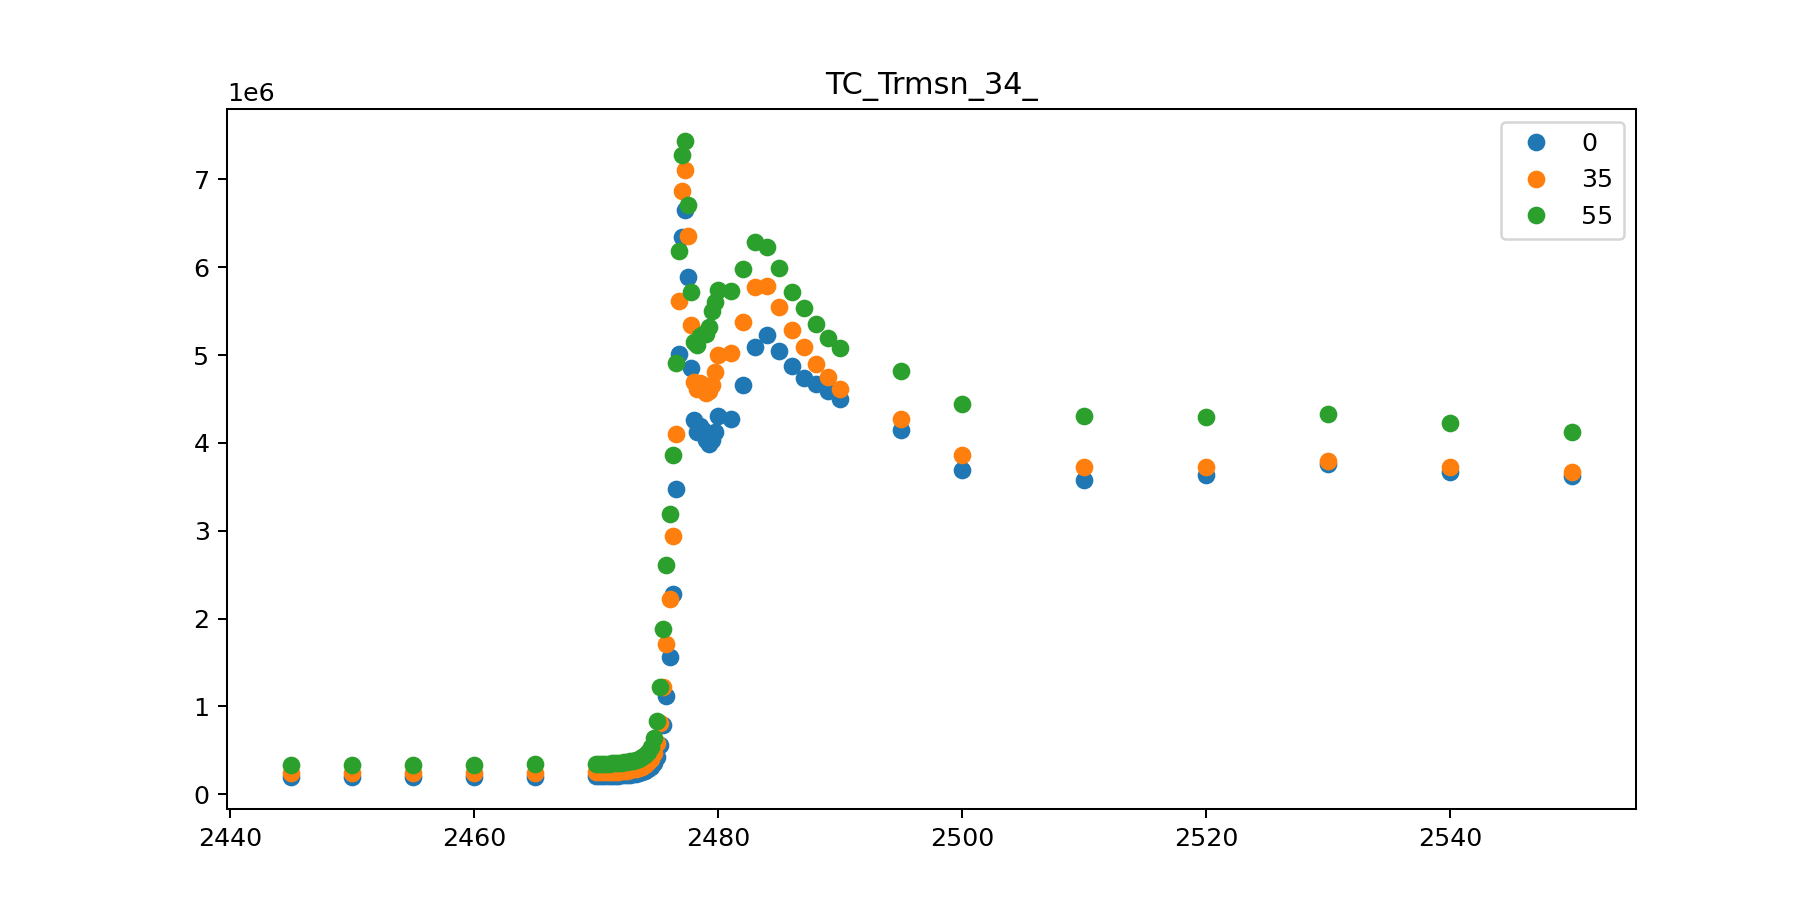

Done


<IPython.core.display.Javascript object>


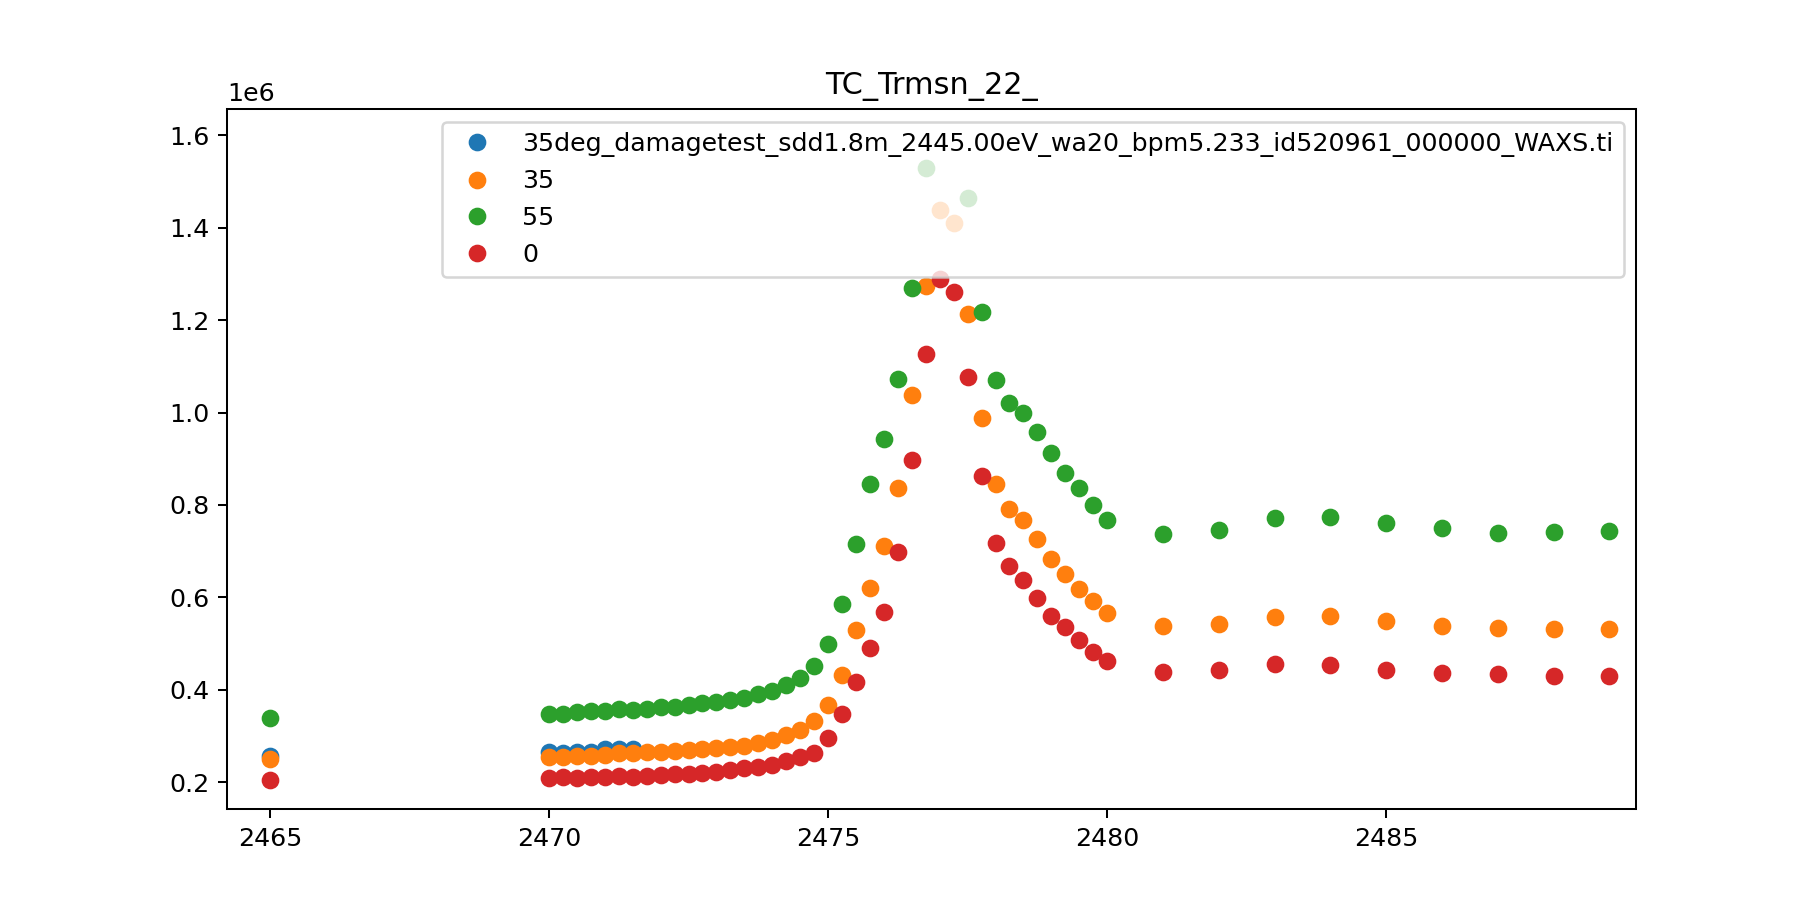

Done


<IPython.core.display.Javascript object>


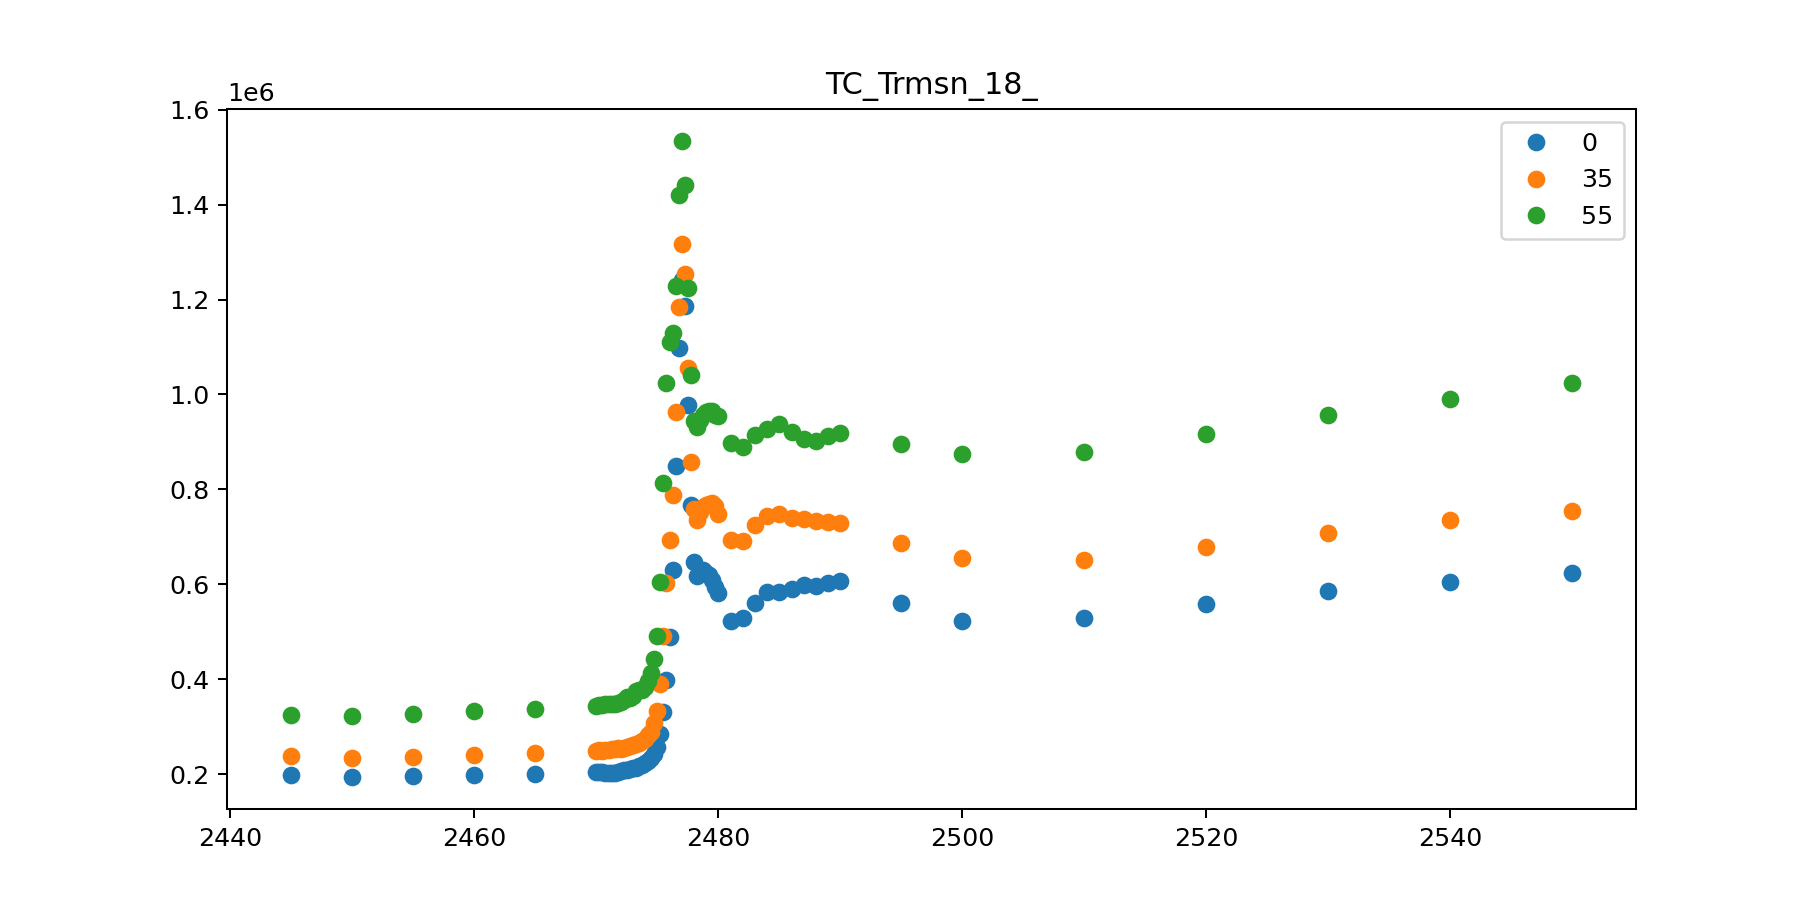

Done


<IPython.core.display.Javascript object>


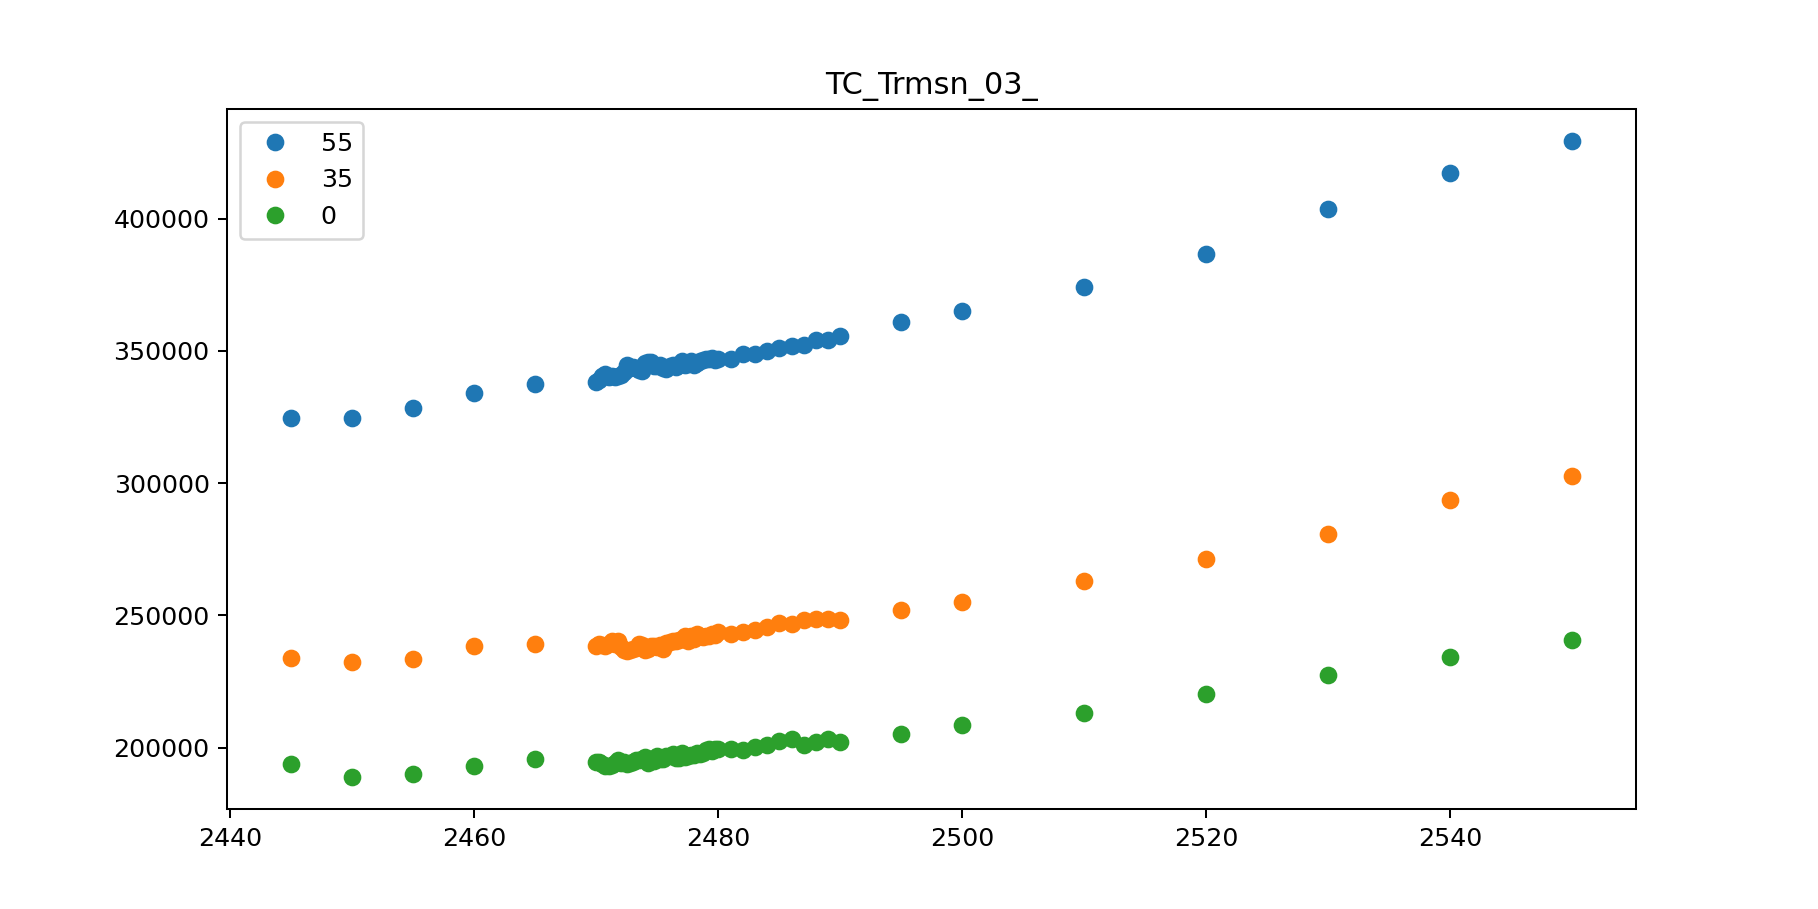

Done


<IPython.core.display.Javascript object>


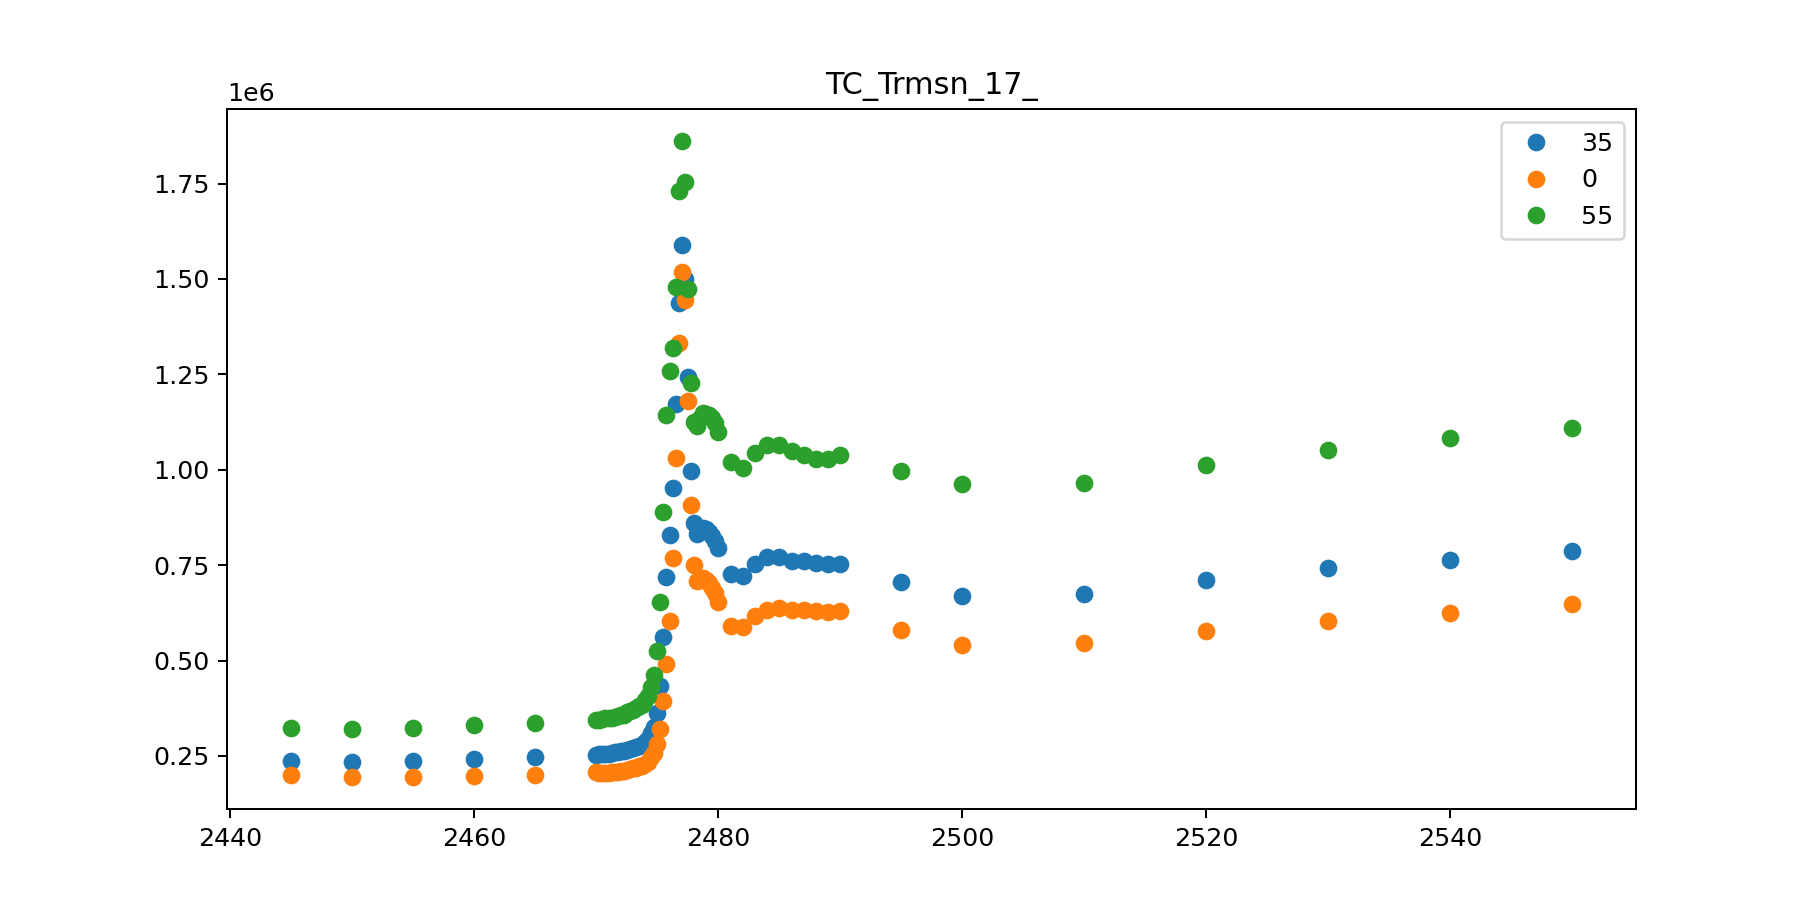

Done


<IPython.core.display.Javascript object>


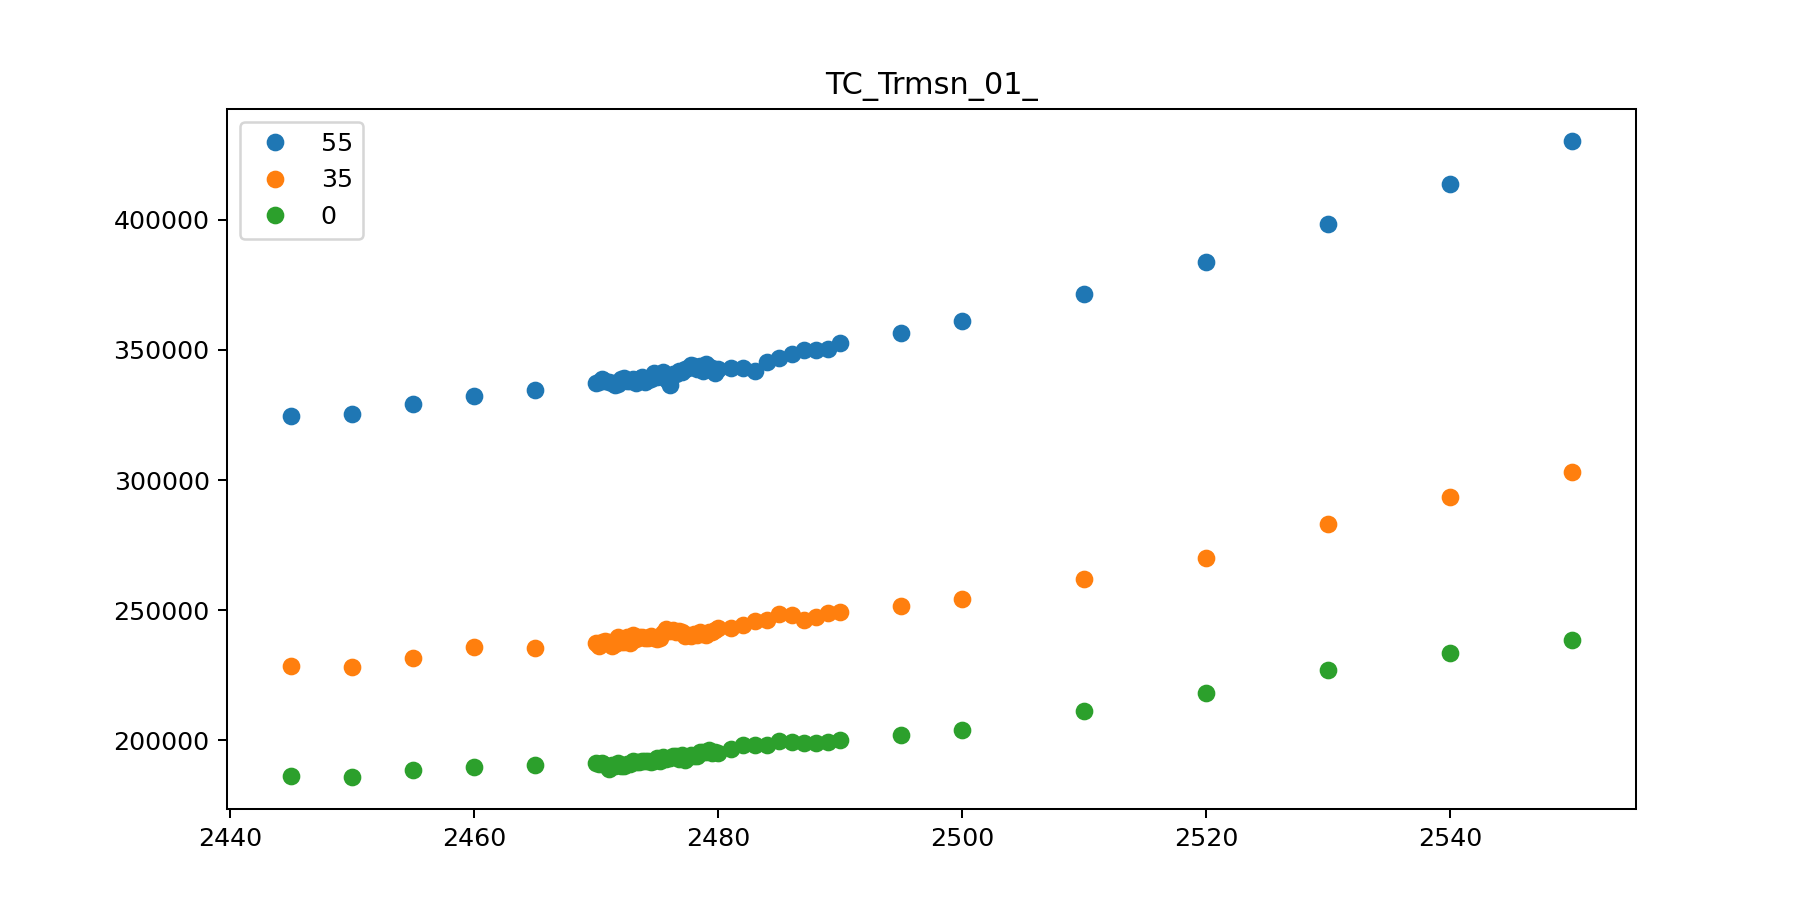

Done


<IPython.core.display.Javascript object>


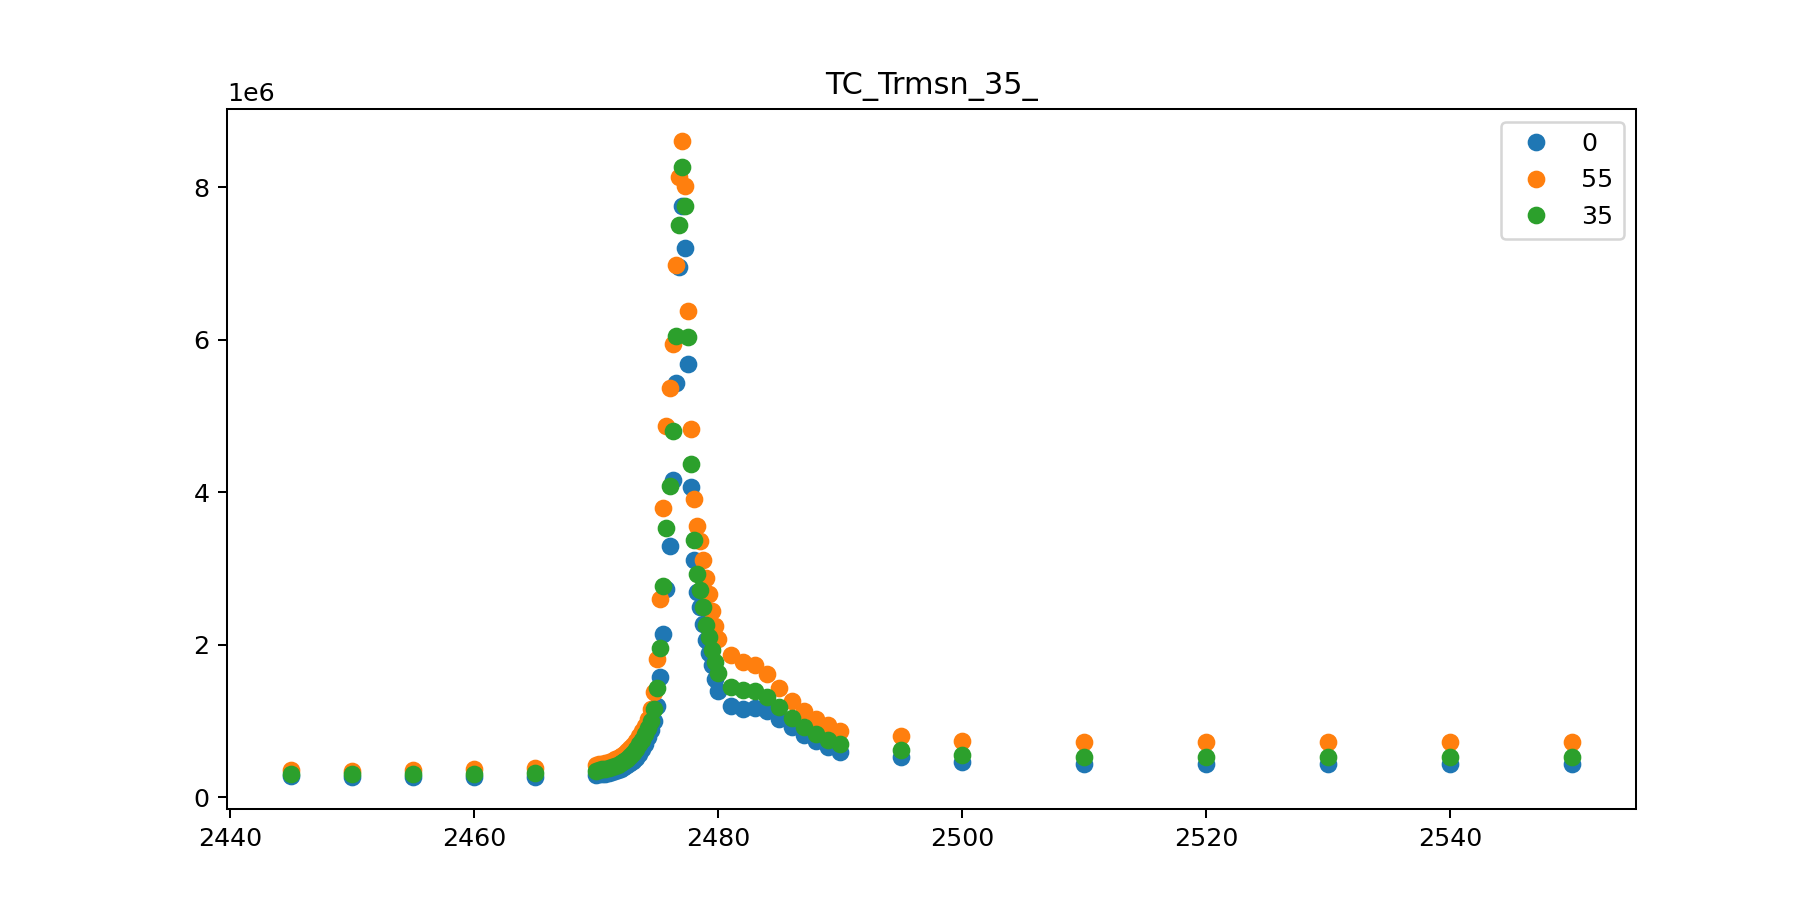

Done


<IPython.core.display.Javascript object>


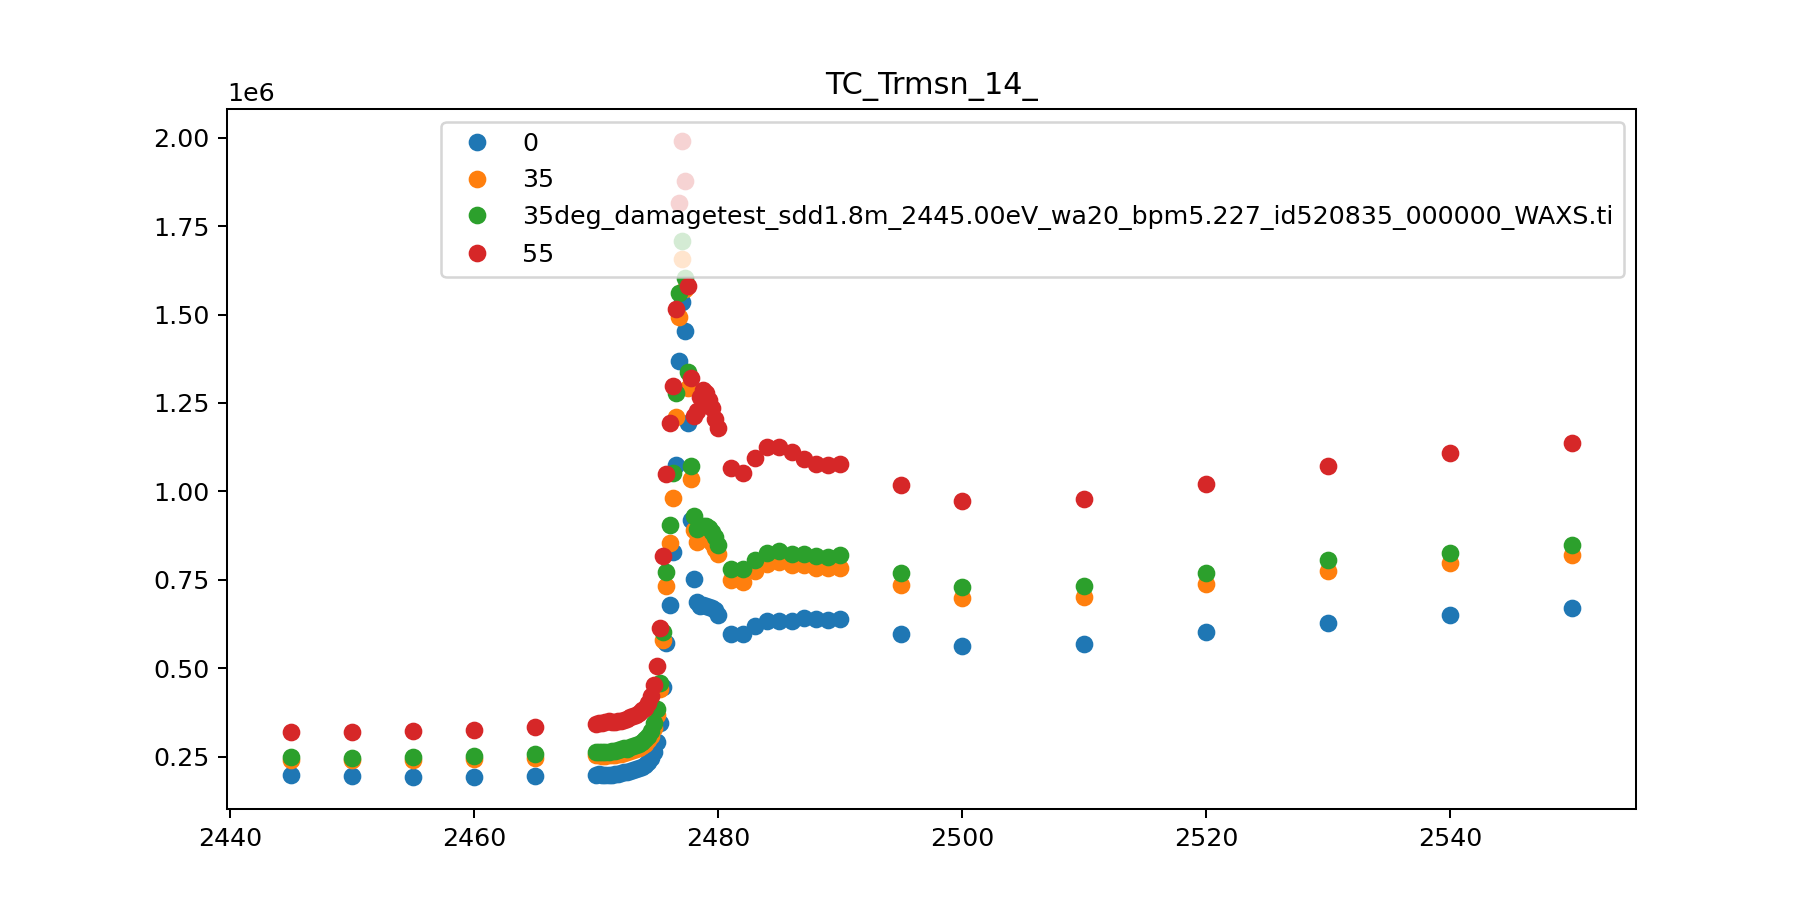

Done


In [9]:
#waxs
flag_save = False
# ResDir = '/nsls2/xf12id2/analysis/%s/%s/'%(CYCLE, proposal_id)
# ResDir2 = '/nsls2/xf12id2/analysis/%s/%s/reduced_nexafs/'%(CYCLE, proposal_id)


samples = ['TC_Trmsn_23_', 'TC_Trmsn_33_', 'TC_Trmsn_26_', 'TC_Trmsn_29_', 'TC_Trmsn_21_', 'TC_Trmsn_30_', 'TC_Trmsn_34_', 
          'TC_Trmsn_22_', 'TC_Trmsn_18_', 'TC_Trmsn_03_', 'TC_Trmsn_17_', 'TC_Trmsn_01_', 'TC_Trmsn_35_', 'TC_Trmsn_14_']

for sample in samples:
    plt.figure()
    plt.title(sample)
    for i, all_d in enumerate(all_dat):
        if len(all_d)!=0:
            if sample in all_d[0]:
                idx=all_d[0].find('prs')
                idx1=all_d[0].find('deg_sdd')

                prs = all_d[0][idx+3:idx1]

                ens0, dat0 = [], []
                ens1, dat1 = [], []

                bpms=[]
                for j, dats in enumerate(sort(all_d)):
                    idx = dats.find('_id')
                    scan_num = int(dats[idx+3:idx+9])

                    idx1 = dats.find('eV')
                    img = fabio.open(os.path.join(path, dats)).data

                    idx_bad = np.where(img>50)
                    img[idx_bad]=0

                    ens1 = ens1 + [float(dats[idx1-7:idx1])]
                    dat1 = dat1 + [np.sum(img[:, 1000:])]


        #         plt.plot(np.asarray(ens0), np.asarray(dat0), 'o', linewidth = 2, color='r')
                plt.plot(np.asarray(ens1), np.asarray(dat1), 'o', linewidth = 2, label=prs)


    #     plt.xlabel('Energy')
    plt.legend()
    plt.show()
# plt.savefig(os.path.join(ResDir, 'nexafs_dichrois_B5.png'))

    print('Done')

In [33]:
#waxs
path = '/nsls2/data/smi/legacy/results/data/%s/%s/900KW/'%(CYCLE, proposal_id)

sam = []
for file in os.listdir(path):
     if '2471.00eV' in file and 'Updownsweep' not in file and 'wa0' in file and 'Si3N4' in file:
        idx = file.find('2471.00eV')
        if file[:idx] not in sam:
            sam = sam + [file[:idx]]

print(sam)

all_dat = [[]] * len(sam)
    
for j, sa in enumerate(sam): 
    for file in sorted(os.listdir(path)):
        if sa in file and 'tif' in file and 'wa0' in file:
            all_dat[j] = all_dat[j] + [file]
            
print(all_dat[0])

['CM_Si3N4_membrane_sdd1.8m_']
['CM_Si3N4_membrane_sdd1.8m_2445.00eV_wa0_bpm5.260_id510679_000000_WAXS.tif', 'CM_Si3N4_membrane_sdd1.8m_2445.00eV_wa0_bpm5.262_id510745_000000_WAXS.tif', 'CM_Si3N4_membrane_sdd1.8m_2450.00eV_wa0_bpm5.282_id510680_000000_WAXS.tif', 'CM_Si3N4_membrane_sdd1.8m_2455.00eV_wa0_bpm5.327_id510681_000000_WAXS.tif', 'CM_Si3N4_membrane_sdd1.8m_2460.00eV_wa0_bpm5.365_id510682_000000_WAXS.tif', 'CM_Si3N4_membrane_sdd1.8m_2465.00eV_wa0_bpm5.409_id510683_000000_WAXS.tif', 'CM_Si3N4_membrane_sdd1.8m_2470.00eV_wa0_bpm5.422_id510684_000000_WAXS.tif', 'CM_Si3N4_membrane_sdd1.8m_2470.00eV_wa0_bpm5.494_id510744_000000_WAXS.tif', 'CM_Si3N4_membrane_sdd1.8m_2470.25eV_wa0_bpm5.442_id510685_000000_WAXS.tif', 'CM_Si3N4_membrane_sdd1.8m_2470.50eV_wa0_bpm5.434_id510686_000000_WAXS.tif', 'CM_Si3N4_membrane_sdd1.8m_2470.75eV_wa0_bpm5.431_id510687_000000_WAXS.tif', 'CM_Si3N4_membrane_sdd1.8m_2471.00eV_wa0_bpm5.447_id510688_000000_WAXS.tif', 'CM_Si3N4_membrane_sdd1.8m_2471.25eV_wa0_bpm

<IPython.core.display.Javascript object>


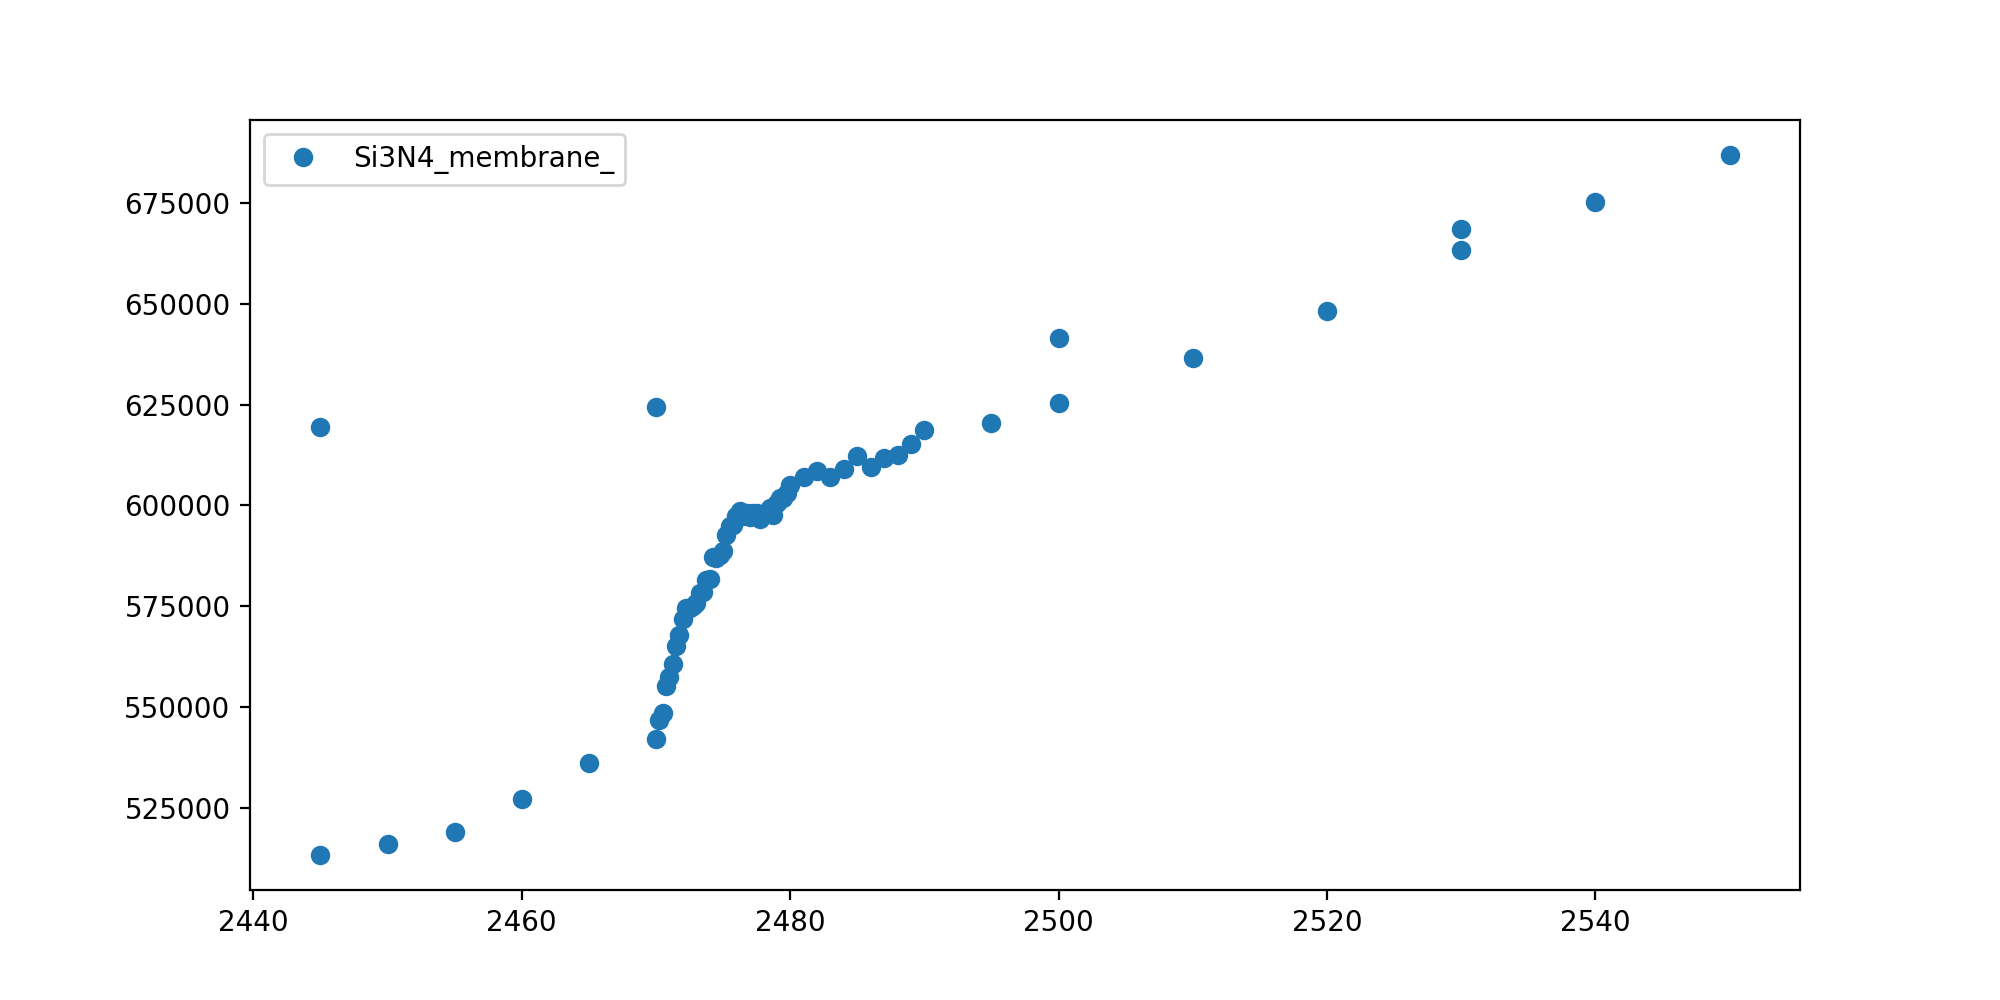

Done


In [35]:
#waxs
flag_save = False
# ResDir = '/nsls2/xf12id2/analysis/%s/%s/'%(CYCLE, proposal_id)
# ResDir2 = '/nsls2/xf12id2/analysis/%s/%s/reduced_nexafs/'%(CYCLE, proposal_id)

plt.figure()


for i, all_d in enumerate(all_dat):
    if len(all_d)!=0:

        ens0, dat0 = [], []
        ens1, dat1 = [], []
        idx2=all_d[0].find('sdd')


        bpms=[]
        for j, dats in enumerate(sort(all_d)):
            idx = dats.find('_id')
            scan_num = int(dats[idx+3:idx+9])
         
            idx1 = dats.find('eV')
            img = fabio.open(os.path.join(path, dats)).data
            
            
#             if scan_num < 511278:
            ens0 = ens0 + [float(dats[idx1-7:idx1])]
            dat0 = dat0 + [np.sum(img[:, 1000:])]
#             else:
#                 ens1 = ens1 + [float(dats[idx1-7:idx1])]
#                 dat1 = dat1 + [np.sum(img[:, 1000:])]

            
        plt.plot(np.asarray(ens0), np.asarray(dat0), 'o', linewidth = 2, label=all_d[0][3:idx2])
#         plt.plot(np.asarray(ens1), np.asarray(dat1), 'o', linewidth = 2, color='k')


    #     plt.xlabel('Energy')
    plt.legend()
    plt.show()
    # plt.savefig(os.path.join(ResDir, 'nexafs_dichrois_B5.png'))


    print('Done')

In [32]:
all_dat

[['CM_PM7_10mg_CB_1_sdd1.8m_2445.00eV_wa0_bpm5.249_id511478_000000_WAXS.tif',
  'CM_PM7_10mg_CB_1_sdd1.8m_2450.00eV_wa0_bpm5.263_id511479_000000_WAXS.tif',
  'CM_PM7_10mg_CB_1_sdd1.8m_2455.00eV_wa0_bpm5.271_id511480_000000_WAXS.tif',
  'CM_PM7_10mg_CB_1_sdd1.8m_2460.00eV_wa0_bpm5.345_id511481_000000_WAXS.tif',
  'CM_PM7_10mg_CB_1_sdd1.8m_2465.00eV_wa0_bpm5.362_id511482_000000_WAXS.tif',
  'CM_PM7_10mg_CB_1_sdd1.8m_2470.00eV_wa0_bpm5.421_id511483_000000_WAXS.tif',
  'CM_PM7_10mg_CB_1_sdd1.8m_2470.25eV_wa0_bpm5.404_id511484_000000_WAXS.tif',
  'CM_PM7_10mg_CB_1_sdd1.8m_2470.50eV_wa0_bpm5.436_id511485_000000_WAXS.tif',
  'CM_PM7_10mg_CB_1_sdd1.8m_2470.75eV_wa0_bpm5.455_id511486_000000_WAXS.tif',
  'CM_PM7_10mg_CB_1_sdd1.8m_2471.00eV_wa0_bpm5.454_id511487_000000_WAXS.tif',
  'CM_PM7_10mg_CB_1_sdd1.8m_2471.25eV_wa0_bpm5.425_id511488_000000_WAXS.tif',
  'CM_PM7_10mg_CB_1_sdd1.8m_2471.50eV_wa0_bpm5.457_id511489_000000_WAXS.tif',
  'CM_PM7_10mg_CB_1_sdd1.8m_2471.75eV_wa0_bpm5.430_id511490_0000

## Data stitching and reduction (all this part is done using SMI_beamline package)

In [4]:
all_dat[0][0]

'LR_mT_pos1_4320.00eV_ai0.60_wa0_bpm75.181_id428545_000000_WAXS.tif'

<IPython.core.display.Javascript object>


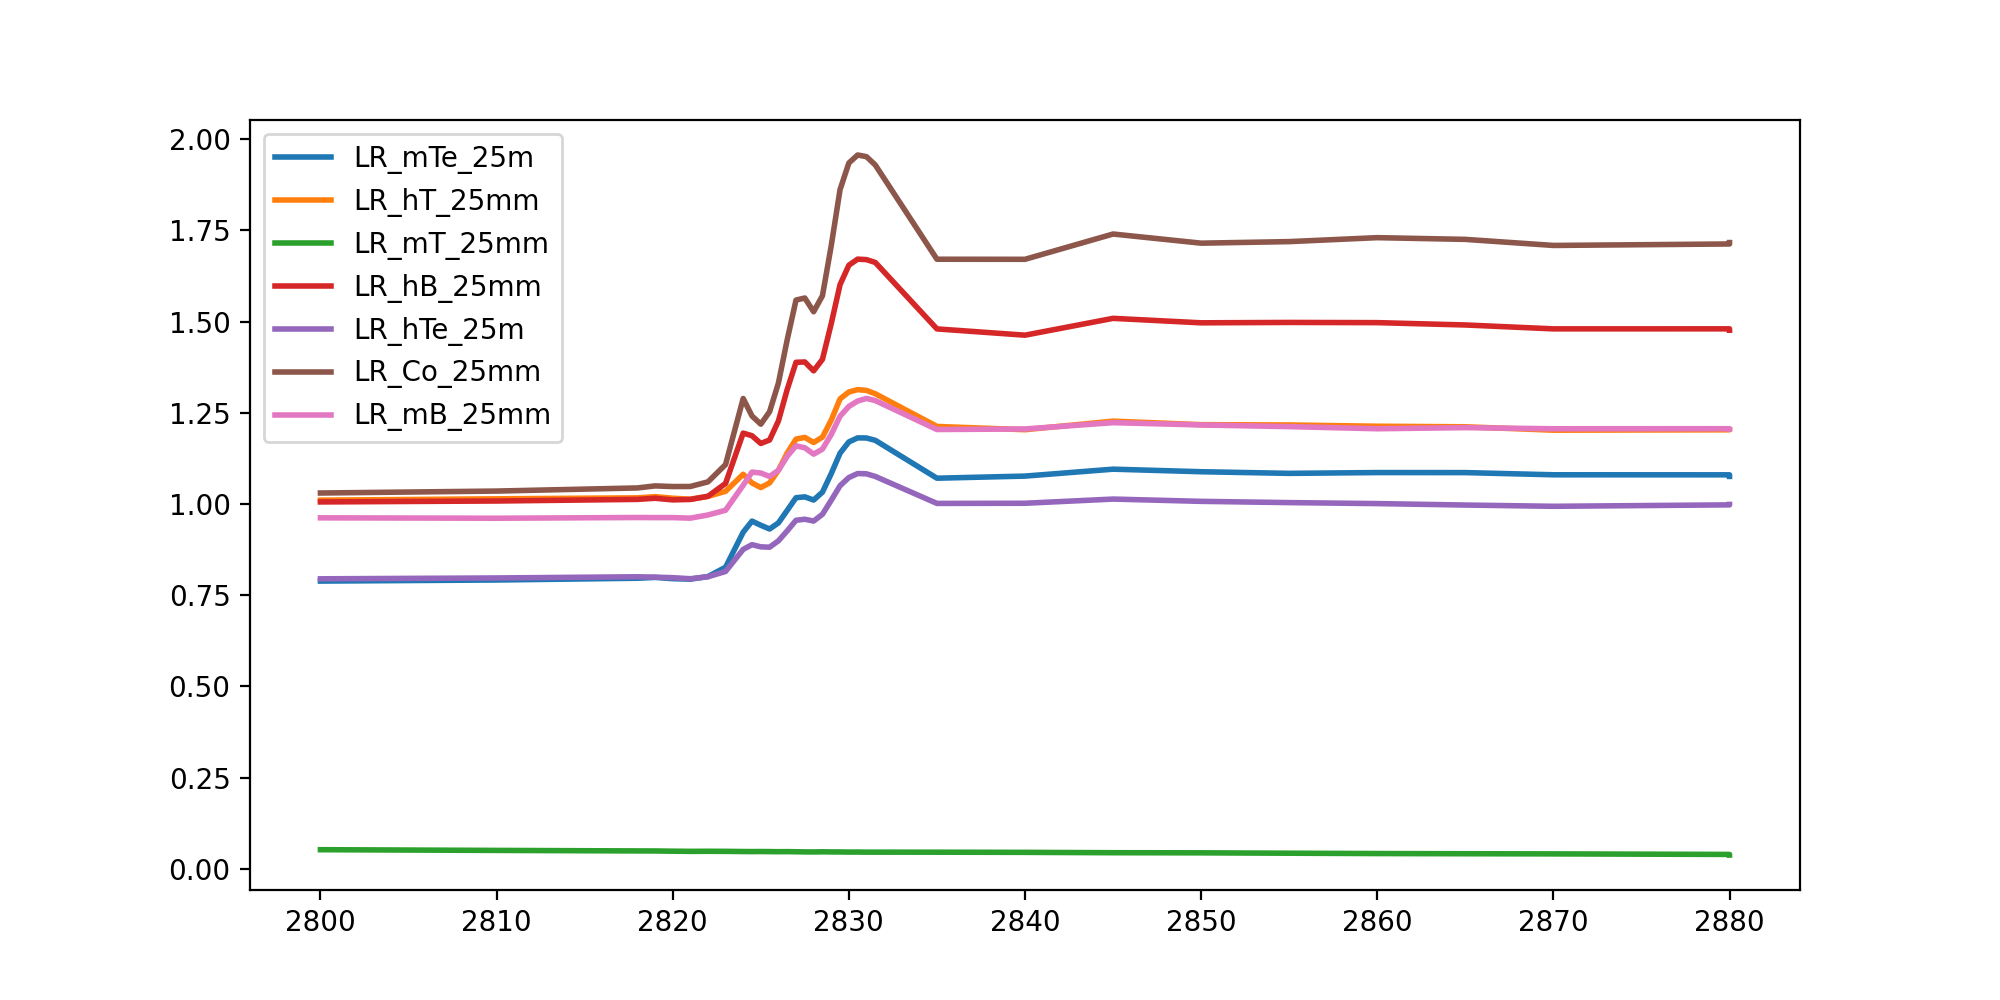

LR_mTe_25mmol_FeCl3_pos1_2800.00eV_ai3.20_wa20_bpm148.439_id484640_000000_WAXS.tif
Done
LR_hT_25mmol_FeCl3_pos1_2800.00eV_ai3.20_wa20_bpm148.788_id483821_000000_WAXS.tif


Done
LR_mT_25mmol_FeCl3_pos1_2800.00eV_ai3.20_wa20_bpm148.686_id484094_000000_WAXS.tif
Done
LR_hB_25mmol_FeCl3_pos1_2800.00eV_ai3.20_wa20_bpm148.241_id485186_000000_WAXS.tif


Done
LR_hTe_25mmol_FeCl3_pos1_2800.00eV_ai3.20_wa20_bpm148.607_id484367_000000_WAXS.tif
Done
LR_Co_25mmol_FeCl3_pos1_2800.00eV_ai3.20_wa20_bpm149.035_id483548_000000_WAXS.tif


Done
LR_mB_25mmol_FeCl3_pos1_2800.00eV_ai3.20_wa20_bpm148.306_id484913_000000_WAXS.tif
Done


In [57]:
#waxs
flag_save = True

plt.figure()

for i, all_d in enumerate(all_dat):
    if len(all_d)!=0:
        print(all_d[0])

        ens, dat = [], []
        ens1, dat1 = [], []
        bpms=[]
        idx = all_d[0].find('pos')
        sam = all_d[0][:idx+4]
        
        for j, dats in enumerate(sort(all_d)):

            idx1 = dats.find('eV')
            ens = ens+[float(dats[idx1-7:idx1])]

    #         idx2 = dats.find('bpm')
    #         bpms= bpms + [float(dats[idx2+3:idx2+8])]


            img = fabio.open(os.path.join(path, dats)).data

            dat = dat + [np.sum(img[:, 1000:])]
    #                 dat1 = dat1 + [np.sum(img[306:313, 215:221])]
    #                 ens1 = ens1 + [en]

        plt.plot(np.asarray(ens), np.asarray(dat)/np.asarray(dat_bkg), linewidth = 2, label=all_d[0][:10])
    plt.legend()
    plt.show()
    
    if flag_save:         
        np.savetxt(os.path.join(ResDir, 'nexafs_rescaled_%s.txt'%sam),
                   np.vstack((np.asarray(ens), np.asarray(dat)/np.asarray(dat_bkg))).T)
        
        np.savetxt(os.path.join(ResDir, 'nexafs_raw_%s.txt'%sam),
                   np.vstack((np.asarray(ens), np.asarray(dat))).T)
        
    # plt.savefig(os.path.join(ResDir, 'nexafs_dichrois_B5.png'))


print('Done')

'LR_mB_25mm'

<IPython.core.display.Javascript object>


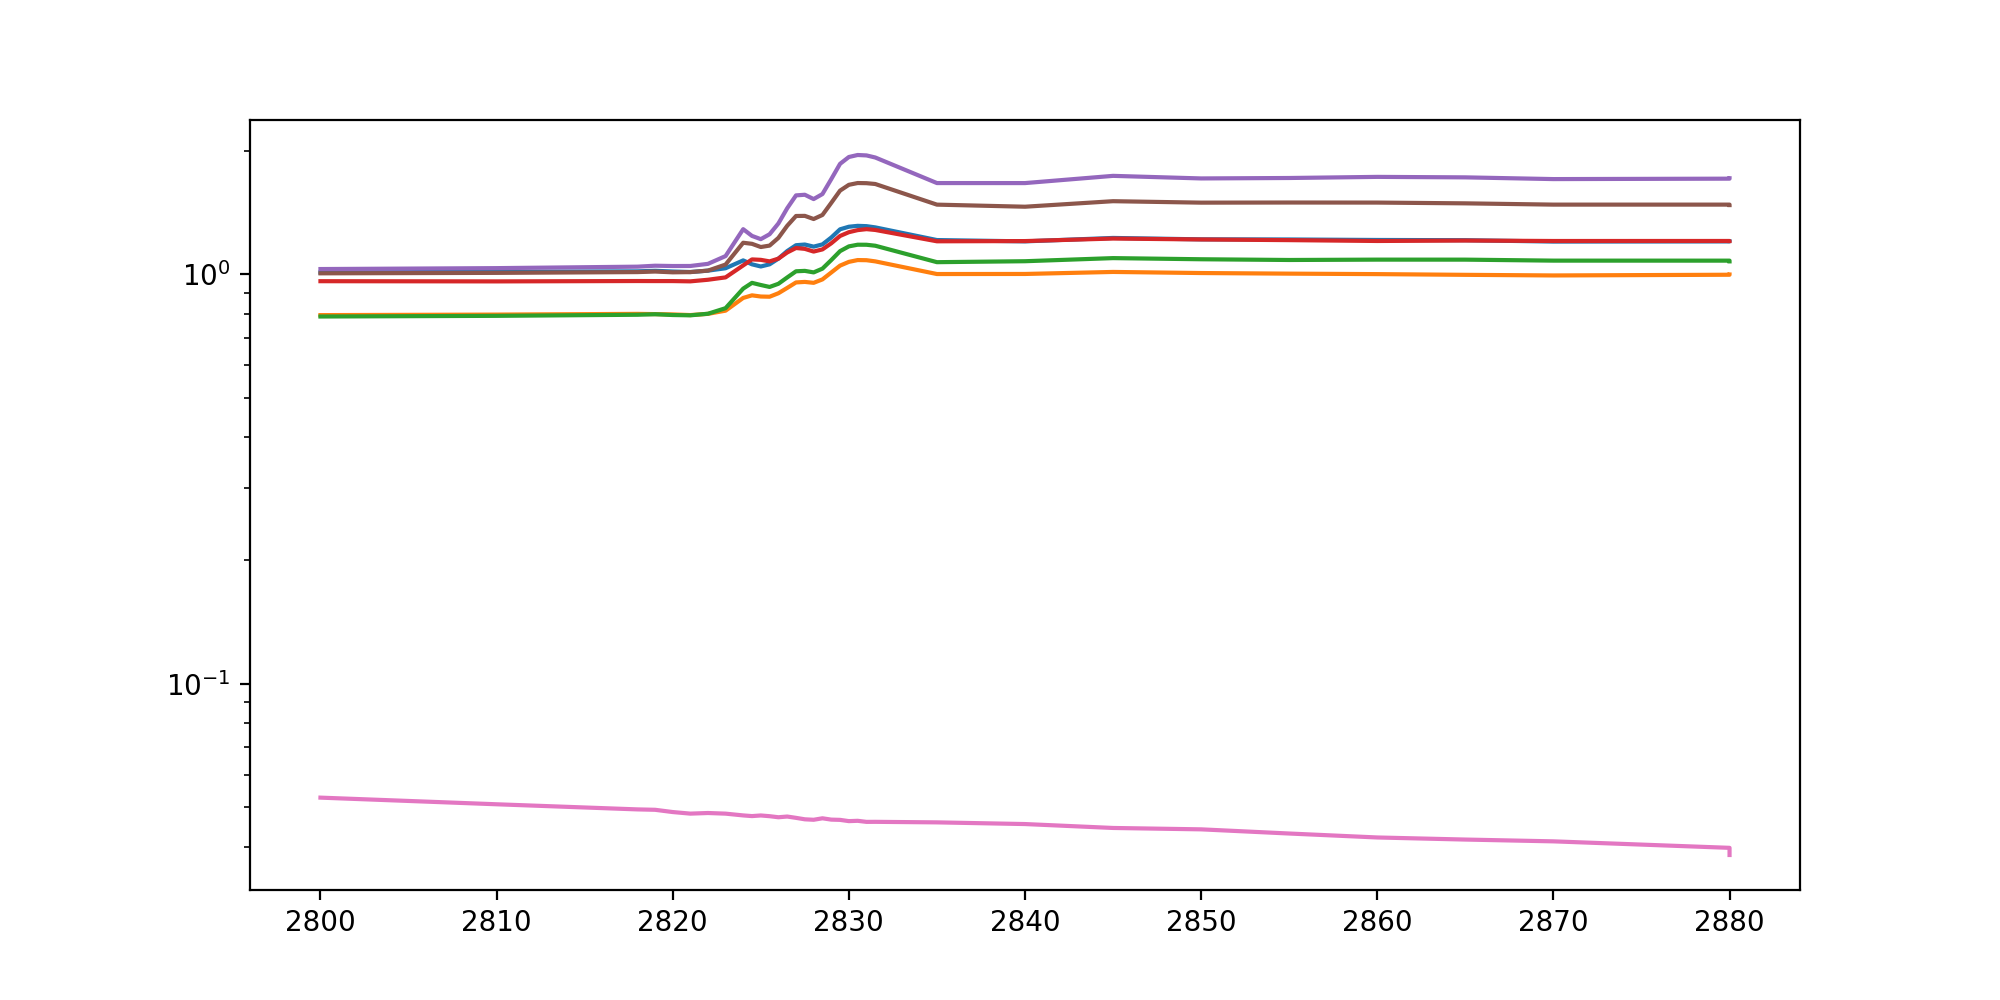

In [58]:
plt.figure()
for file in os.listdir(ResDir):
    if 'rescale' in file:
        pr = np.loadtxt(os.path.join(ResDir, file))
        plt.plot(pr[:, 0], pr[:, 1])

plt.yscale('log')
plt.show()

<IPython.core.display.Javascript object>


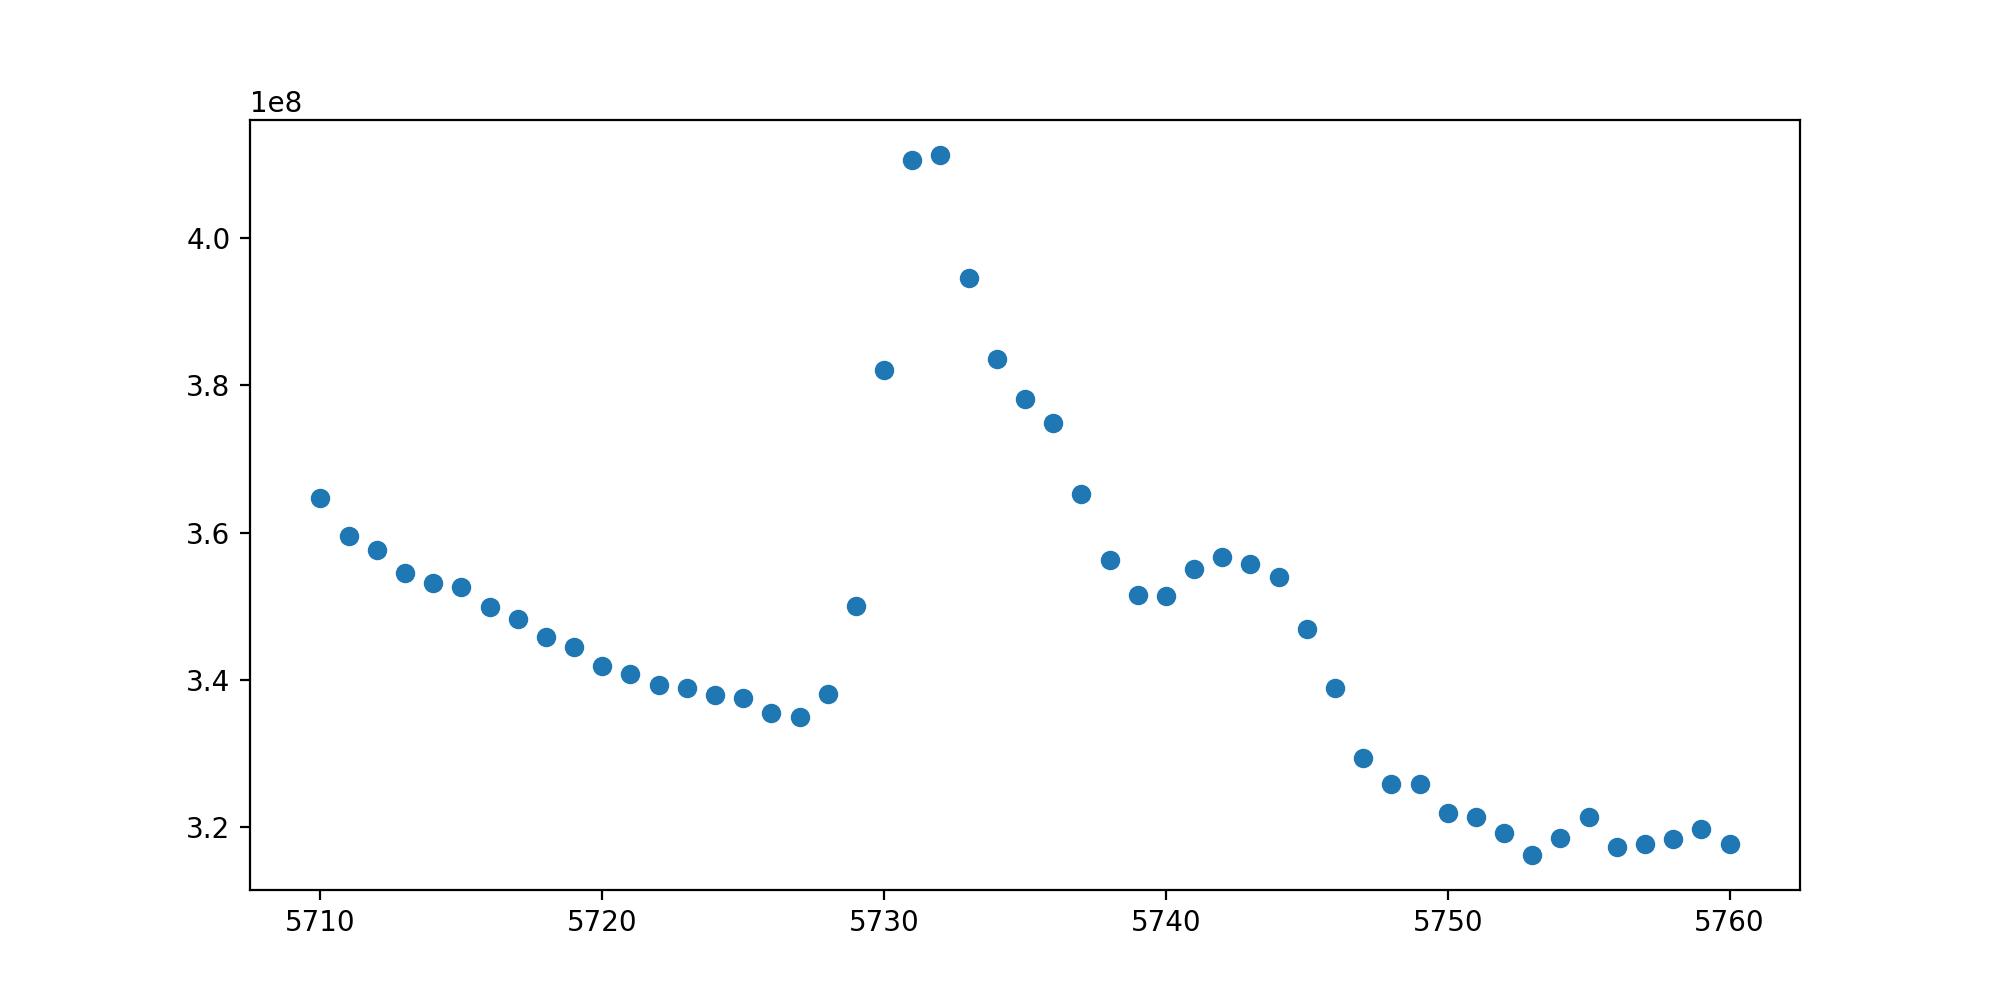

In [15]:
plt.figure()
plt.plot(np.asarray(ens), np.asarray(dat)*np.asarray(bpms), 'o', linewidth = 2)
plt.show()

<IPython.core.display.Javascript object>


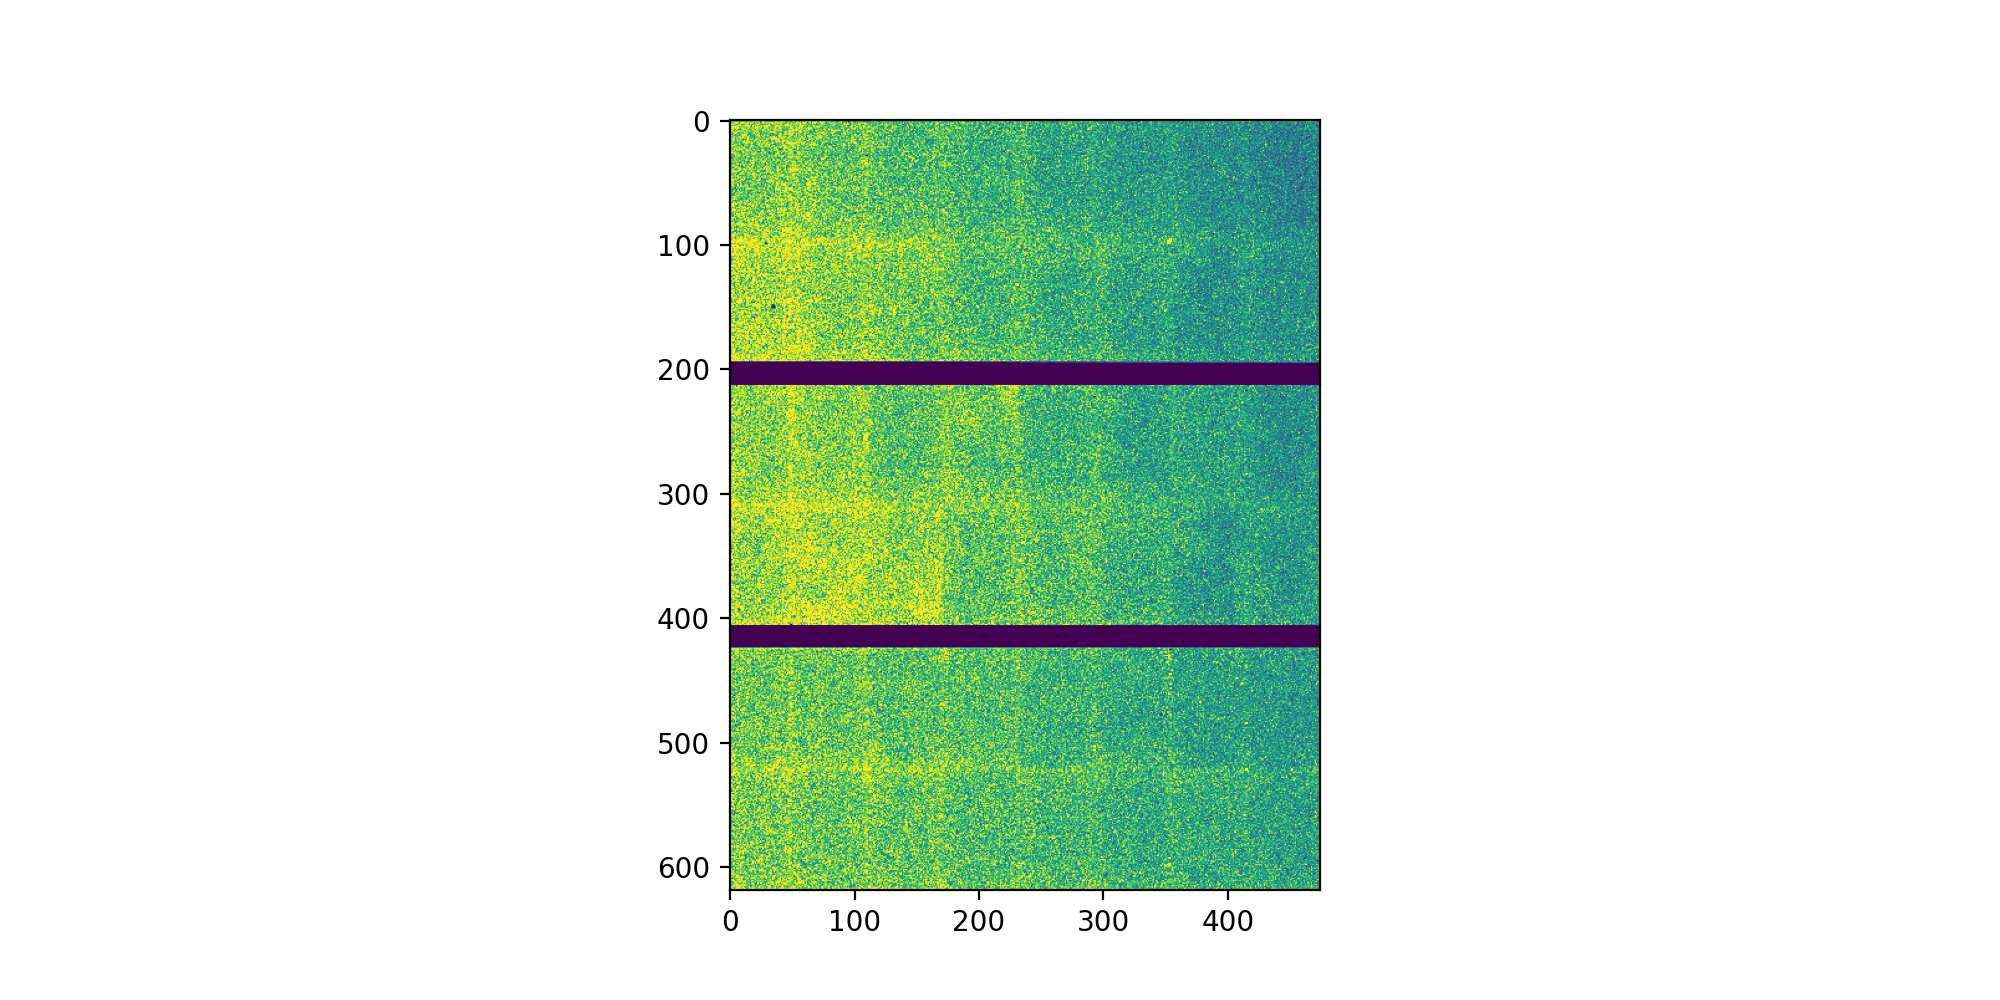

In [18]:
plt.figure()
plt.imshow(img[:, 1000:], vmin=0, vmax=20)
plt.show()

In [87]:
#waxs
path = '/nsls2/data/smi/legacy/results/data/%s/%s/1M/'%(CYCLE, proposal_id)
ResDir = '/nsls2/data/smi/legacy/results/analysis/%s/%s/'%(CYCLE, proposal_id)

sam = []
for file in os.listdir(path):
     if 'test_MoKedge_scanbs' in file and 'id179021' not in file:
        idx = file.find('_0000')
        if file[:idx] not in sam:
            sam = sam + [file[:idx]]

print(sam)

all_dat = [[]] * len(sam)
    
for j, sa in enumerate(sam): 
    for file in sorted(os.listdir(path)):
        if sa in file and 'tif' in file:
            all_dat[j] = all_dat[j] + [file]
            
print(all_dat[0])

['test_MoKedge_scanbs_id179022', 'test_MoKedge_scanbs_id179023']
['test_MoKedge_scanbs_id179022_000000_SAXS.tif', 'test_MoKedge_scanbs_id179022_000001_SAXS.tif', 'test_MoKedge_scanbs_id179022_000002_SAXS.tif', 'test_MoKedge_scanbs_id179022_000003_SAXS.tif', 'test_MoKedge_scanbs_id179022_000004_SAXS.tif', 'test_MoKedge_scanbs_id179022_000005_SAXS.tif', 'test_MoKedge_scanbs_id179022_000006_SAXS.tif', 'test_MoKedge_scanbs_id179022_000007_SAXS.tif', 'test_MoKedge_scanbs_id179022_000008_SAXS.tif', 'test_MoKedge_scanbs_id179022_000009_SAXS.tif', 'test_MoKedge_scanbs_id179022_000010_SAXS.tif', 'test_MoKedge_scanbs_id179022_000011_SAXS.tif', 'test_MoKedge_scanbs_id179022_000012_SAXS.tif', 'test_MoKedge_scanbs_id179022_000013_SAXS.tif', 'test_MoKedge_scanbs_id179022_000014_SAXS.tif', 'test_MoKedge_scanbs_id179022_000015_SAXS.tif', 'test_MoKedge_scanbs_id179022_000016_SAXS.tif', 'test_MoKedge_scanbs_id179022_000017_SAXS.tif', 'test_MoKedge_scanbs_id179022_000018_SAXS.tif', 'test_MoKedge_scanbs_i

In [19]:
np.sort(all_d)

array(['GF_nexafs_E1_01_ai0.5_wa40_id287938_000000_WAXS.tif',
       'GF_nexafs_E1_01_ai0.5_wa40_id287938_000001_WAXS.tif',
       'GF_nexafs_E1_01_ai0.5_wa40_id287938_000002_WAXS.tif',
       'GF_nexafs_E1_01_ai0.5_wa40_id287938_000003_WAXS.tif',
       'GF_nexafs_E1_01_ai0.5_wa40_id287938_000004_WAXS.tif',
       'GF_nexafs_E1_01_ai0.5_wa40_id287938_000005_WAXS.tif',
       'GF_nexafs_E1_01_ai0.5_wa40_id287938_000006_WAXS.tif',
       'GF_nexafs_E1_01_ai0.5_wa40_id287938_000007_WAXS.tif',
       'GF_nexafs_E1_01_ai0.5_wa40_id287938_000008_WAXS.tif',
       'GF_nexafs_E1_01_ai0.5_wa40_id287938_000009_WAXS.tif',
       'GF_nexafs_E1_01_ai0.5_wa40_id287938_000010_WAXS.tif',
       'GF_nexafs_E1_01_ai0.5_wa40_id287938_000011_WAXS.tif',
       'GF_nexafs_E1_01_ai0.5_wa40_id287938_000012_WAXS.tif',
       'GF_nexafs_E1_01_ai0.5_wa40_id287938_000013_WAXS.tif',
       'GF_nexafs_E1_01_ai0.5_wa40_id287938_000014_WAXS.tif',
       'GF_nexafs_E1_01_ai0.5_wa40_id287938_000015_WAXS.tif',
       '

<IPython.core.display.Javascript object>


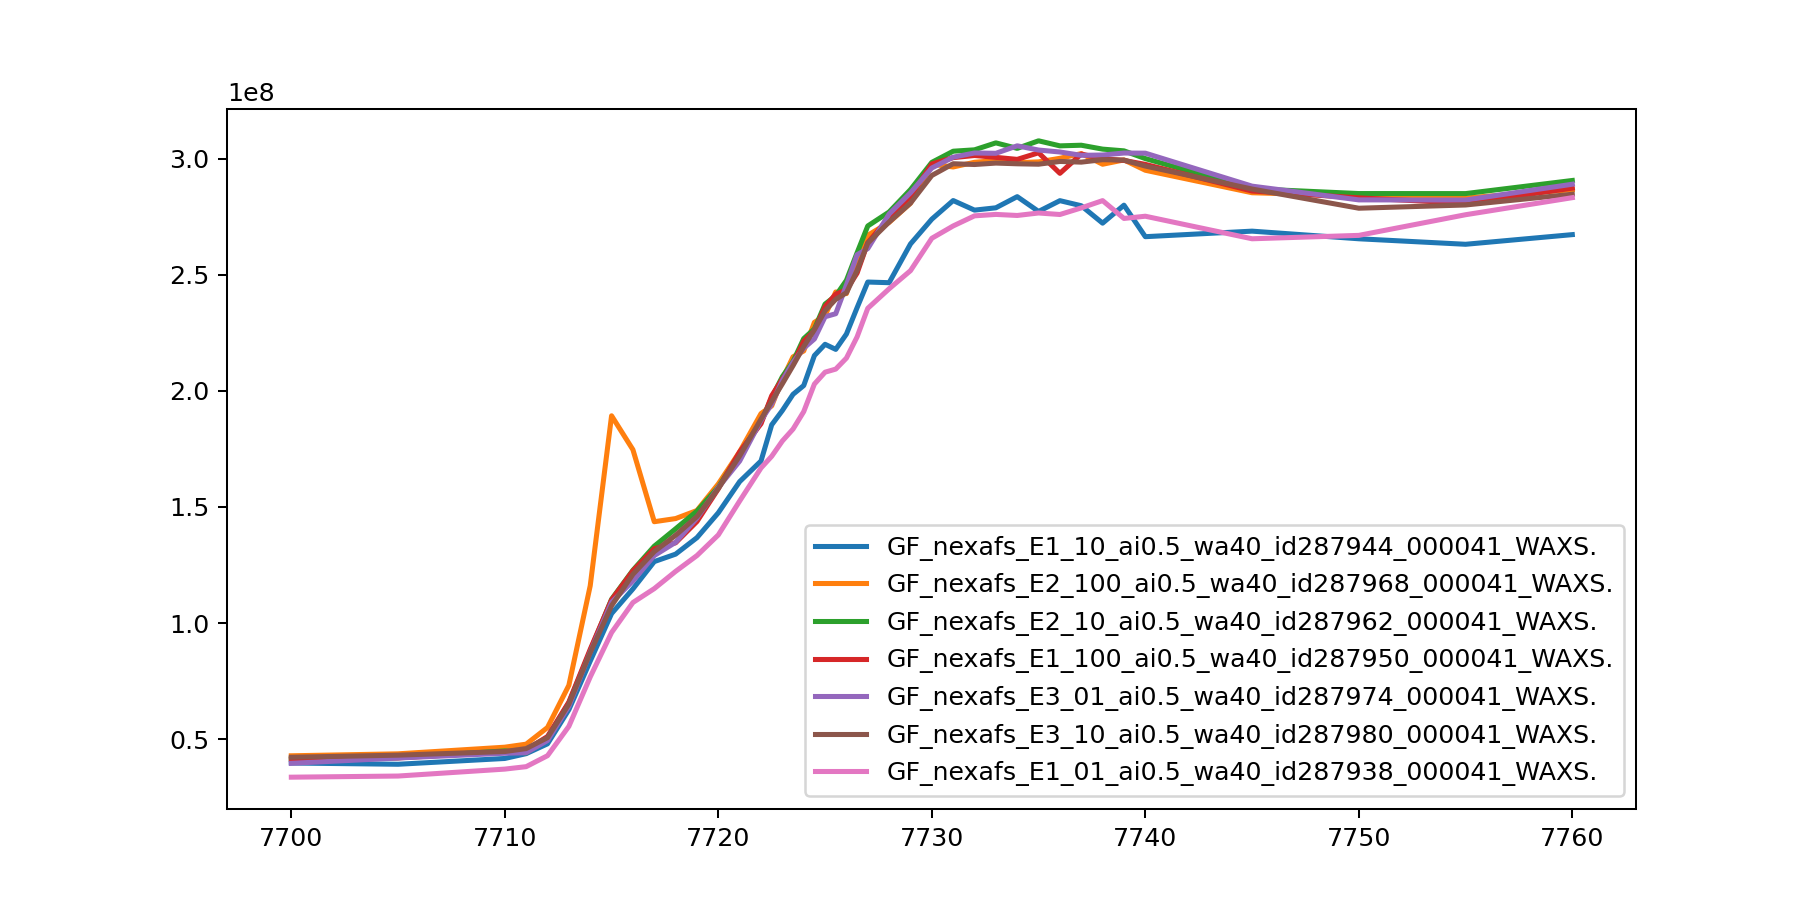

Done


In [32]:
#waxs
flag_save = False
# ResDir = '/nsls2/xf12id2/analysis/%s/%s/'%(CYCLE, proposal_id)
# ResDir2 = '/nsls2/xf12id2/analysis/%s/%s/reduced_nexafs/'%(CYCLE, proposal_id)

plt.figure()

for i, all_d in enumerate(all_dat):
    ens, dat = [], []
    ens1, dat1 = [], []
    for j, dats in enumerate(np.sort(all_d)):

        energies = (np.arange(7700, 7710, 5).tolist() + np.arange(7710, 7722, 1).tolist() + 
                    np.arange(7722, 7727, 0.5).tolist()+ np.arange(7727, 7740, 1).tolist() + 
                    np.arange(7740, 7765, 5).tolist())

        img = fabio.open(os.path.join(path, dats)).data

        dat = dat + [np.sum(img[:, 1200:])]
#                 dat1 = dat1 + [np.sum(img[306:313, 215:221])]
#                 ens1 = ens1 + [en]

    plt.plot(energies, dat, linewidth = 2, label = dats[:idx-6], )
#         plt.plot(ens1, dat1, linewidth = 2, label = dats[:idx-6])

    #         np.savetxt(os.path.join(ResDir2, 'nexafs_notscaled_%s.txt'%dats[:idx-8]),
    #                    np.vstack((np.asarray(ens), np.asarray(dat))).T)
    #         np.savetxt(os.path.join(ResDir2, 'nexafs_scaled_%s.txt'%dats[:idx-8]),
    #                np.vstack((np.asarray(ens), scaled)).T)

#     plt.xlabel('Energy')
plt.legend()
plt.show()
# plt.savefig(os.path.join(ResDir, 'nexafs_dichrois_B5.png'))

    
print('Done')

<IPython.core.display.Javascript object>


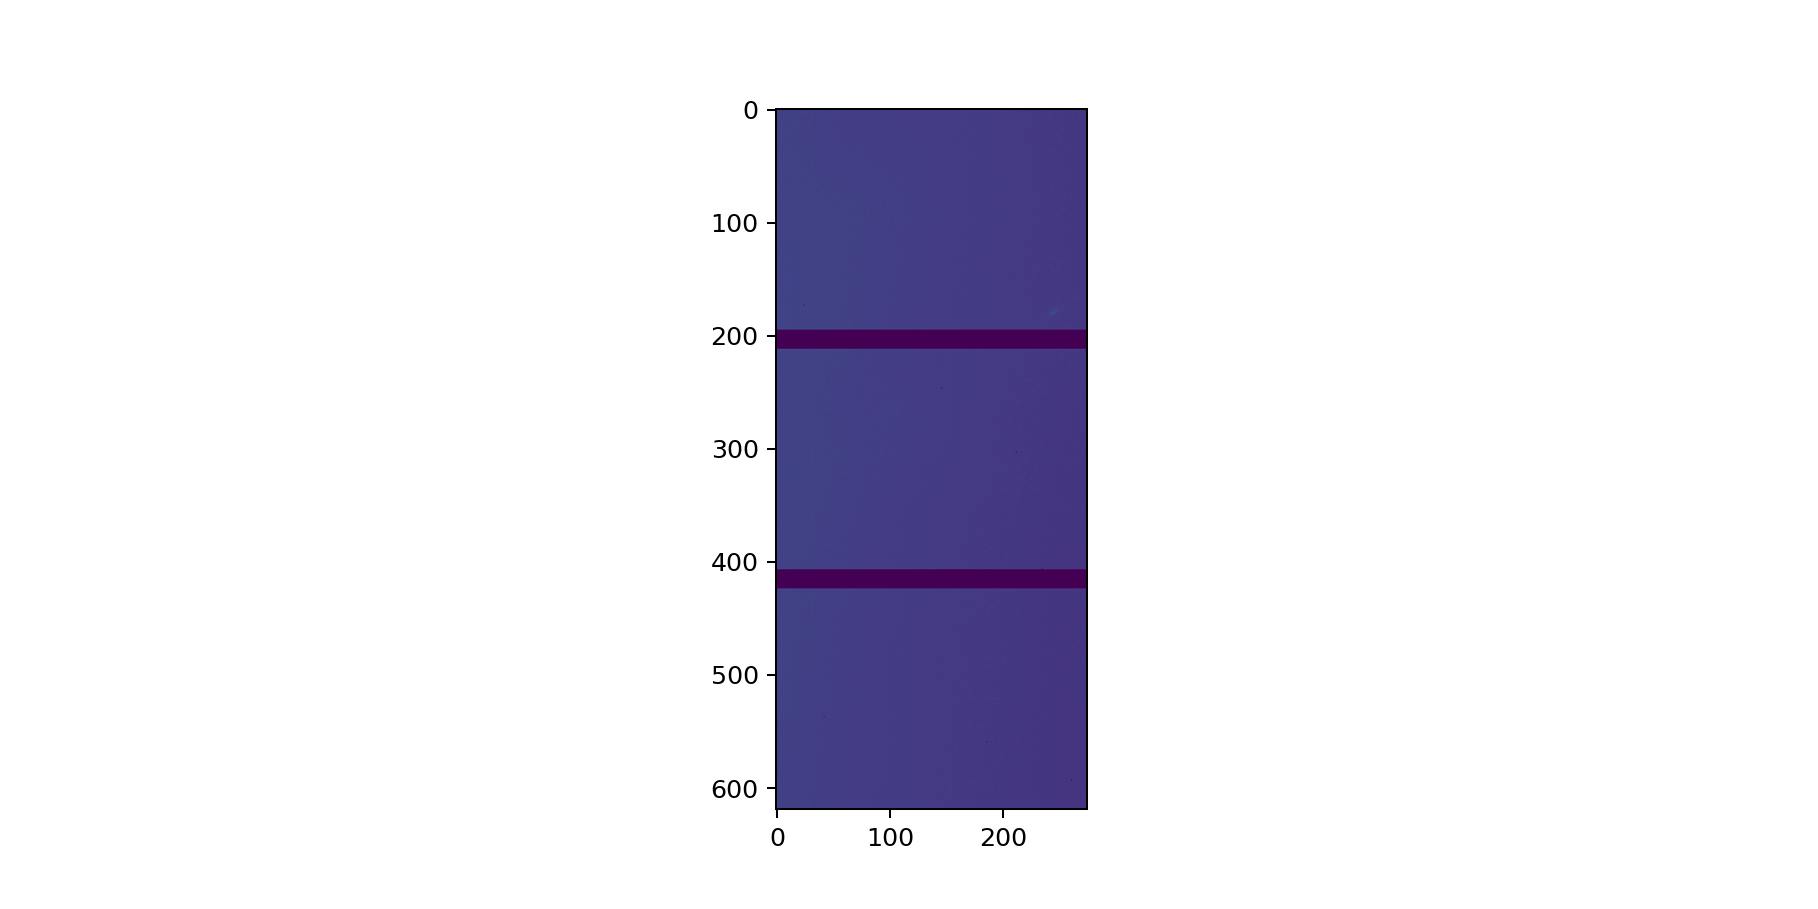

In [26]:
plt.figure()
plt.imshow(img[:, 1200:], aspect=1, vmin=0, vmax=10000)
plt.show()

In [59]:
ens

[19970.0,
 19971.0,
 19972.0,
 19973.0,
 19974.0,
 19975.0,
 19976.0,
 19977.0,
 19978.0,
 19979.0,
 19980.0,
 19981.0,
 19982.0]

<IPython.core.display.Javascript object>


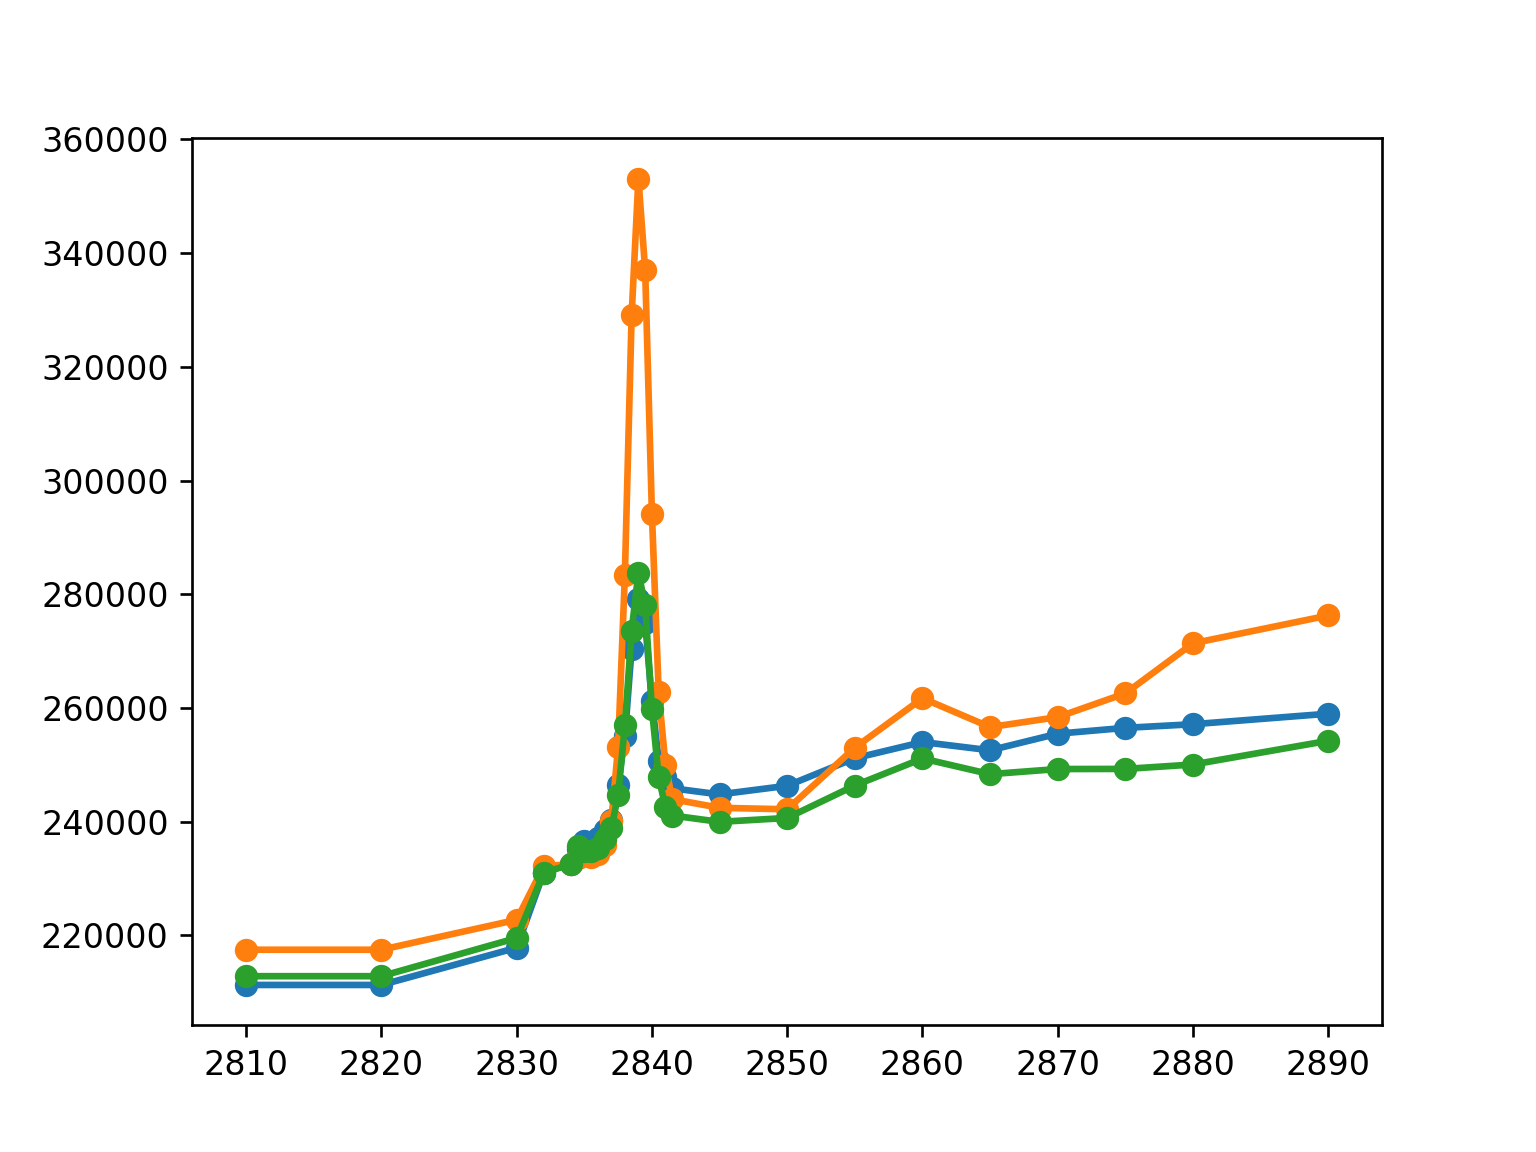

In [21]:
plt.figure()
plt.plot(np.asarray(ens), np.asarray(dat), linewidth = 2, label = dats[:idx-6], marker='o')
plt.plot(np.asarray(ens1), np.asarray(dat1), linewidth = 2, label = dats[:idx-6], marker='o')
plt.plot(np.asarray(ens2), np.asarray(dat2), linewidth = 2, label = dats[:idx-6], marker='o')

plt.show()

<IPython.core.display.Javascript object>


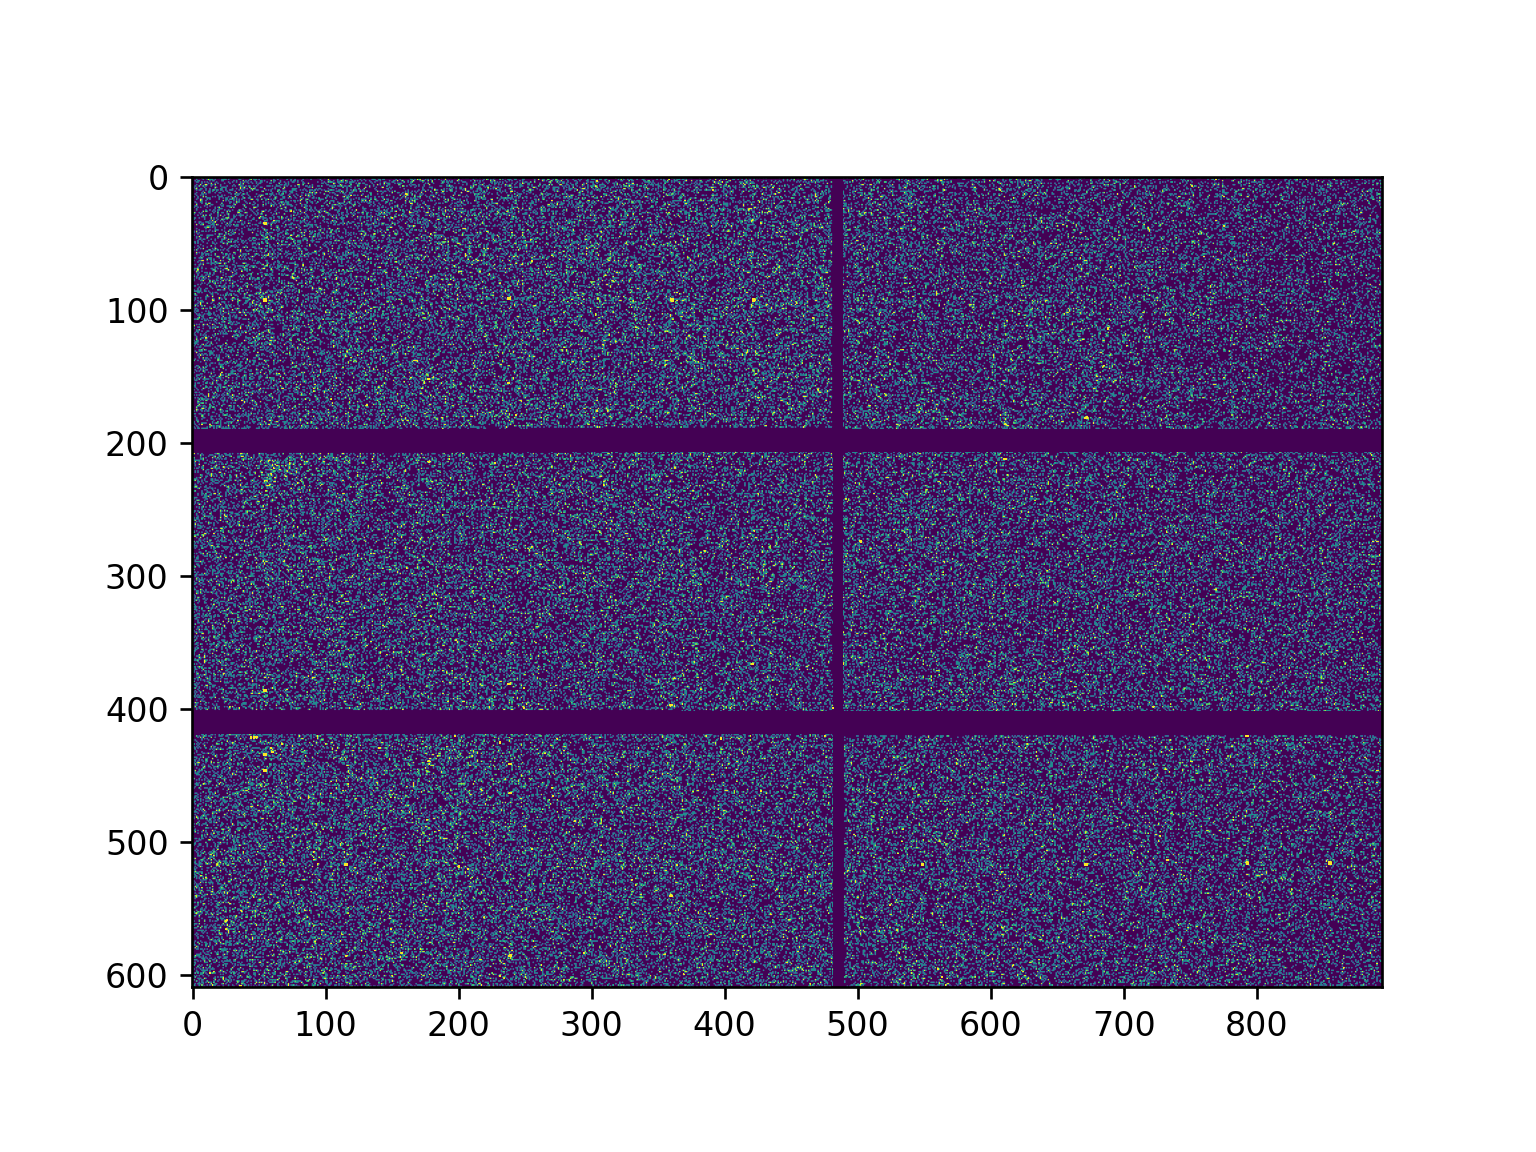

In [27]:
plt.figure()
plt.imshow(img[5:-5, 5:900], vmin=0, vmax=np.percentile(img, 97))
plt.show()

<IPython.core.display.Javascript object>


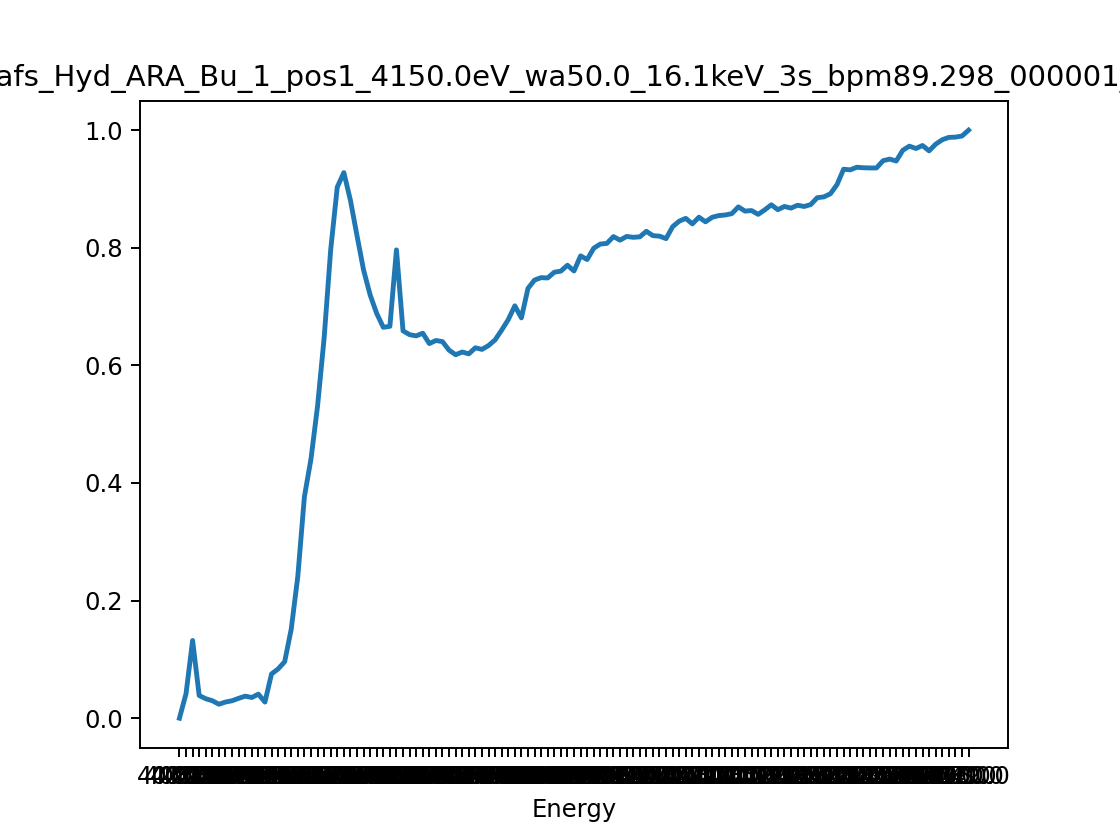

<IPython.core.display.Javascript object>

Done
Done


In [21]:
plt.figure()
plt.title(dats)
plt.plot(ens, scaled, linewidth = 2, label = sample)
plt.xlabel('Energy')
plt.show()
# plt.savefig(os.path.join(ResDir, 'nexafs_allsamples.png'))

print('Done')

In [ ]:
#waxs
flag_save = True
path = '/nsls2/xf12id2/data/images/users/%s/%s/300KW/'%(CYCLE, proposal_id)
ResDir = '/nsls2/xf12id2/analysis/%s/%s/reduced_waxs/'%(CYCLE, proposal_id)

for j, dat in enumerate(all_da):
    idx = dat[0].find('_WAXS')
    pos = int(dat[0][idx-5:idx])
    if True:#'q_map_waxs_%s_pos%s.png'%(sam[j], pos) not in os.listdir(ResDir):
        print(dat[0])
        SMI_waxs = SMI_beamline.SMI_geometry(geometry = 'Transmission',
                                             detector = detector_waxs,
                                             sdd = sdd_waxs,
                                             wav = wav,
                                             alphai = np.deg2rad(0),
                                             center = center_waxs,
                                             bs_pos = bs_pos_waxs,
                                             det_ini_angle = det_ini_angle,
                                             det_angle_step = det_angle_step,
                                             bs_kind = None)

        idx1 = dat[0].find('pos')
        for dat_kap in all_da_kap:
            if dat[0][idx1:idx1+4] in dat_kap[0] and dat[0][idx-5:idx] in dat_kap[0]:
                SMI_waxs.open_data(path, dat_kap)
                bkg_imgs = SMI_waxs.imgs

        SMI_waxs.open_data(path, dat)

        plt.figure()
        for i, (img, mask) in enumerate(zip(SMI_waxs.imgs, SMI_waxs.masks)):
            SMI_waxs.imgs[i] = SMI_waxs.imgs[i] - bkg_imgs[i]
            plt.subplot(1, len(SMI_waxs.imgs), i+1)
            plt.imshow(SMI_waxs.imgs[i], vmin = 0, vmax = np.percentile(img, 97))
        plt.show()


        SMI_waxs.stitching_data()

        plt.figure()
        plt.imshow(np.log(SMI_waxs.img_st),
                   extent=[SMI_waxs.qp[0], SMI_waxs.qp[-1], SMI_waxs.qz[0], SMI_waxs.qz[-1]])    
        plt.title('waxs_%s'%sam[j])
        plt.xlabel('$q_{par}(A^{-1})$')
        plt.ylabel('$q_{ver}(A^{-1})$')
        plt.colorbar()
        plt.show()

        SMI_waxs.radial_averaging(azimuth_range=[-90, 0], npt=2000)


        if flag_save:
            #Save the plot as a png
            plt.savefig(os.path.join(ResDir, 'q_map_waxs_%s_pos%s.png'%(sam[j], pos)))

            #Save the qx and qy as an 1D array
            np.savetxt(os.path.join(ResDir, 'qpar_waxs_%s_pos%s.txt'%(sam[j], pos)), np.linspace(SMI_waxs.qp[0], SMI_waxs.qp[1], np.shape(SMI_waxs.img_st)[1]))
            np.savetxt(os.path.join(ResDir, 'qver_waxs_%s_pos%s.txt'%(sam[j], pos)), np.linspace(SMI_waxs.qz[0], SMI_waxs.qz[1], np.shape(SMI_waxs.img_st)[0])) 

            #Save the stitched image as a tiff
            fabio.tifimage.TifImage(np.nan_to_num(SMI_waxs.img_st).astype('int')).write(os.path.join(ResDir, 'q_map_waxs_%s_pos%s.tiff'%(sam[j], pos))) 

            #Save the sum image as a tiff
            np.savetxt(os.path.join(ResDir, 'Radint_waxs_%s_pos%s.txt'%(sam[j], pos)), np.vstack((SMI_waxs.q_rad, SMI_waxs.I_rad)).T)

#         plt.close()  
        plt.figure()
        plt.plot(SMI_waxs.q_rad, SMI_waxs.I_rad)
        plt.yscale('log')
        plt.show()

print('Done')